# Lightcurve Plots

In [1]:
"""
IMPORTS
"""
import numpy as np
import re
import matplotlib.pyplot as plt
import lmfit
from lmfit import Parameters, fit_report, minimize
from lmfit.models import ExponentialModel, GaussianModel, PowerLawModel, ExpressionModel, LinearModel

In [2]:
"""
CONSTANTS
"""
beta = 1/3      # spectral index
H0 = 70         # Hubble parameter
WM = 0.3        # Omega(matter)
WV = 0.7        # Omega(Vaccuum)
WR = 0.         # Omega(radiation)
WK = 0.         # Omega curvaturve = 1-Omega(total)
c = 299792.458  # velocity of light in km/sec
Tyr = 977.8     # coefficent for converting 1/H into Gyr
DTT = 0.5       # time from z to now in units of 1/H0
age = 0.5       # age of Universe in units of 1/H0
zage = 0.1      # age of Universe at redshift z in units of 1/H0
a = 1.0         # 1/(1+z), the scale factor of the Universe
az = 0.5        # 1/(1+z(object))

In [217]:
"""
FUNCTIONS
"""
# luminosity function
def L(flux, d_l, z, beta):
    
    # empty array for the luminosity
    lum = []
    
    # define luminosity function
    for i in flux:
        
        F = i*1e-29 # convert units to erg s^-1 cm^-2 Hz^-1
        L = F*4*np.pi*(d_l**2)*(1+z)**(beta-1)
        lum.append(L)
        
    return lum

# luminosity error function
def L_err(flux_err, d_l, z, beta):

    # empty array for the error
    lum_err = []
    
    # define error function
    for j in flux_err:
        
        # convert units to erg s^-1 cm^-2 Hz^-1
        F_err = j*1e-29
        
        err = F_err*4*np.pi*(d_l**2)*(1+z)**(beta-1)
        lum_err.append(err)
        
    return lum_err

# weight of the error in luminosity
def weight(lum_err):
    
    # empty array for the weights
    weight_lum = []
    
    # define weight function
    for k in lum_err:
        
        weight = 1/k
        weight_lum.append(weight)
    
    return weight_lum

# simple power law of form L = Nx^-a
def power_law1(time, N, a): 
    
    # empty array for the data
    prediction = []
    
    for x in time:
    
        y = N*np.power(x,a)
        prediction.append(y)
    
    return prediction

In [218]:
"""
REDSHIFTS
"""

# open afterglow data
with open("Radio_data.txt") as file_1:
    # splits data into lines
    data_1 = file_1.readlines()

names = []
GRB_sample = []         # names of all GRBs in sample

# generate list of GRBs in sample
for i in data_1:
    
    # splits data into rows
    row = i.split()
    names.append(row[0])

for GRB in names:
    if GRB not in GRB_sample:
        GRB_sample.append(GRB)
         
# open redshift data

GRB_redshift=[]
Redshift= []        # all redshifts
sample= []
z_sample = []       # redshifts in sample

with open('Redshifts.txt') as fp:

    for line in fp.readlines():
        row=line.split()
        
        try:
            if float(row[-1]) <10:
                
                z = float(row[-1])
                GRB_redshift.append([row[0], z])     # all GRBs with redshift
                Redshift.append(z)
                
        except:
            pass   


GRB_z = [item for item in GRB_redshift if item[0] in GRB_sample]


z_all = []          # redshifts of GRBs in sample
GRB_all = []        # GRBs in sample with redshifts

for data in GRB_z:
    z_all.append(data[1])
    GRB_all.append(data[0])

1


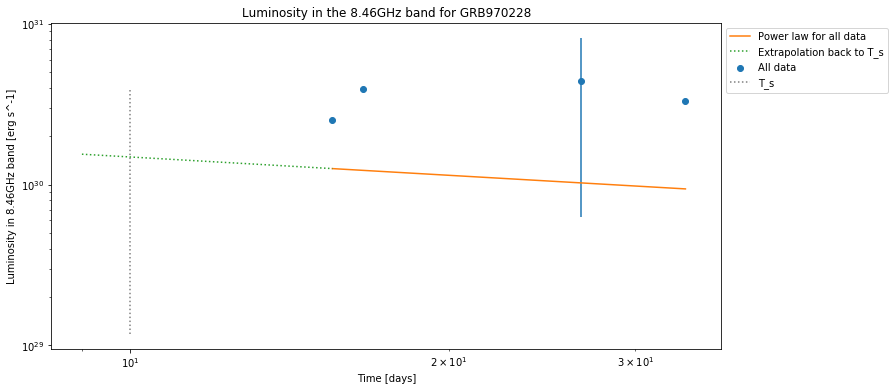

In [219]:
"""
TEST BOX FOR TESTING FUNCTIONS
"""

# data

lum = [2.532757438567469e+30, 3.9574334977616704e+30, 4.4323255174930715e+30, 3.324244138119803e+30]
lum_err = [4.5906228574035383e+30, 4.115730837672138e+30, 3.7991361578512036e+30, 4.4323255174930715e+30]
time = [15.52, 16.6, 26.68, 33.45]


x = 0

test_list = list(zip(lum, lum_err))

for y in test_list:
    if y[0] > y[1]:
        x+=1

print(x)




# call on weight function to get the weights of the luminosity errorss
weight_lum_new = weight(lum_err_new)

# making power law model for linear fits
model1 = PowerLawModel(prefix='pow_')

# make parameters with starting values
par1 = model1.make_params(pow_amplitude=1e31, pow_exponent=-0.5)

# create results for these parameters using the weights
result1 = model1.fit(lum_new, par1, x=time_new, weights=weight_lum_new)

# get a and N from the results
a1 = result1.best_values['pow_exponent']
N1 = result1.best_values['pow_amplitude']

# call on power law function to create line with these parameters
decay_line = power_law1(time, N1, a1)

# create power law that extrapolates back to T_s
time_extrap = np.linspace(T_s - 1, time[0], num = 1000)
decay_line_extrap = power_law1(time_extrap, N1, a1)

# Finding the luminosity at T_s
diff = []
for T in time_extrap:
    diff.append(abs(T-T_s))

idx_T_s = np.argmin(diff)
early_lum = decay_line_extrap[idx_T_s]

# plot scatter graph of the individual luminosity curves
plt.figure(figsize = (12, 6))
plt.title(f'Luminosity in the 8.46GHz band for GRB{first_GRB}')
plt.xscale("log")
plt.xlabel("Time [days]")
plt.yscale("log")
plt.ylabel("Luminosity in 8.46GHz band [erg s^-1]")
plt.scatter(time, lum, label='All data')
plt.errorbar(time, lum, yerr = lum_err, fmt = ' ')
# plot the decay line for data beyond T_s
plt.plot(time, decay_line, label='Power law for all data')
# plot extrapolated line to get early luminosity from
plt.plot(time_extrap, decay_line_extrap, linestyle=':', label='Extrapolation back to T_s')
# plot a line showing T
plt.vlines(x=10, ymin=ymin_T_s, ymax=ymax_T_s, colors='grey', linestyle=':', label='T_s')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [220]:
"""
LUMINOSITY DISTANCE
"""

# Define constants
H0 = 70         # Hubble parameter
WM = 0.3        # Omega(matter)
WV = 0.7        # Omega(Vaccuum)
WR = 0.         # Omega(radiation)
WK = 0.         # Omega curvaturve = 1-Omega(total)
c = 299792.458  # velocity of light in km/sec
Tyr = 977.8     # coefficent for converting 1/H into Gyr
DTT = 0.5       # time from z to now in units of 1/H0
age = 0.5       # age of Universe in units of 1/H0
zage = 0.1      # age of Universe at redshift z in units of 1/H0
a = 1.0         # 1/(1+z), the scale factor of the Universe
az = 0.5        # 1/(1+z(object))
h = H0/100.
WR = 4.165E-5/(h*h)   # includes 3 massless neutrino species, T0 = 2.72528
WK = 1-WM-WR-WV
age = 0.
n=1000         # number of points in integrals

# empty list for data
d_l_all = []        # all luminosity distances

for z in z_all:

    az = 1.0/(1+1.0*z)
    
    for i in range(n):
        a = az*(i+0.5)/n
        adot = np.sqrt(WK+(WM/a)+(WR/(a*a))+(WV*a*a))
        age = age + 1./adot

    zage = az*age/n
    zage_Gyr = (Tyr/H0)*zage
    DTT = 0.0
    DCMR = 0.0

    # do integral over a=1/(1+z) from az to 1 in n steps, midpoint rule
    for i in range(n):
        a = az+(1-az)*(i+0.5)/n
        adot = np.sqrt(WK+(WM/a)+(WR/(a*a))+(WV*a*a))
        DTT = DTT + 1./adot
        DCMR = DCMR + 1./(a*adot)

    DTT = (1.-az)*DTT/n
    DCMR = (1.-az)*DCMR/n
    age = DTT+zage
    age_Gyr = age*(Tyr/H0)
    DTT_Gyr = (Tyr/H0)*DTT
    DCMR_Gyr = (Tyr/H0)*DCMR
    DCMR_Mpc = (c/H0)*DCMR

    # tangential comoving distance

    ratio = 1.00
    x = np.sqrt(abs(WK))*DCMR
    if x > 0.1:
        if WK > 0:
            ratio =  0.5*(np.exp(x)-np.exp(-x))/x 
        else:
            ratio = np.sin(x)/x
    else:
        y = x*x
        if WK < 0: y = -y
        ratio = 1. + y/6. + y*y/120.
        DCMT = ratio*DCMR
        DA = az*DCMT
        DA_Mpc = (c/H0)*DA
        kpc_DA = DA_Mpc/206.264806
        DA_Gyr = (Tyr/H0)*DA
        DL = DA/(az*az)
        DL_Mpc = (c/H0)*DL

    # luminosuity distance in cm
    d_l = DL_Mpc * 3.08568e24
    
    d_l_all.append(d_l)

GRB_z_d_l = []      # GRB name with corresponding redshift and lum distance

for name, z, d_l in zip(GRB_all, z_all, d_l_all):
    GRB_z_d_l.append([name, z, d_l])

In [221]:
"""
DATA FOR FREQUENCY RANGE
"""

# empty array to hold data
GRB_name = []
time_array = []
flux_array = []
flux_err_array = []
data_freq_all = []
data_freq = []
  


# split data by GRB
for i in data_1[1:]:
    
    # splits data into rows
    row = i.split()
    freq = float(row[6])
    
    # gets only data points for in required range
    if freq < 8.8:
        
        if freq > 8.2:
            
            # add all data to required array
            GRB_name.append(row[0])
            time_array.append(float(row[5]))
            flux_array.append(float(row[7]))
            flux_err_array.append(float(row[8]))
            data_freq_all.append([row[0], float(row[5]), float(row[7]), float(row[8]), freq])

            # checks whether there is a flux and an error for the data point
            for item in data_freq_all:

                item[1:] = [x for x in item[1:] if x > 0]

            if len(item)>3:
                data_freq.append(item)
                

In [222]:
"""
DATA FOR SPECIFIC FREQUENCY
"""

# empty array to hold data for 8.46GHz
GRB_name = []
time_array = []
flux_array = []
flux_err_array = []
data_freq_all = []



# split data by GRB
for i in data_1:
    
    # splits data into rows
    row = i.split()
    freq = row[6]
    
    # Gets only data points for 8.46GHz
    if freq == '8.46':
        
        GRB_name.append(row[0])
        time_array.append(float(row[5]))
        flux_array.append(float(row[7]))
        flux_err_array.append(float(row[8]))
        data_freq_all.append([row[0], float(row[5]), float(row[7]), float(row[8])])
        
    else:
        continue


data_freq = []

for item in data_freq_all:
    
    item[1:] = [x for x in item[1:] if x > 0]
    
    if len(item)>3:
        data_freq.append(item)

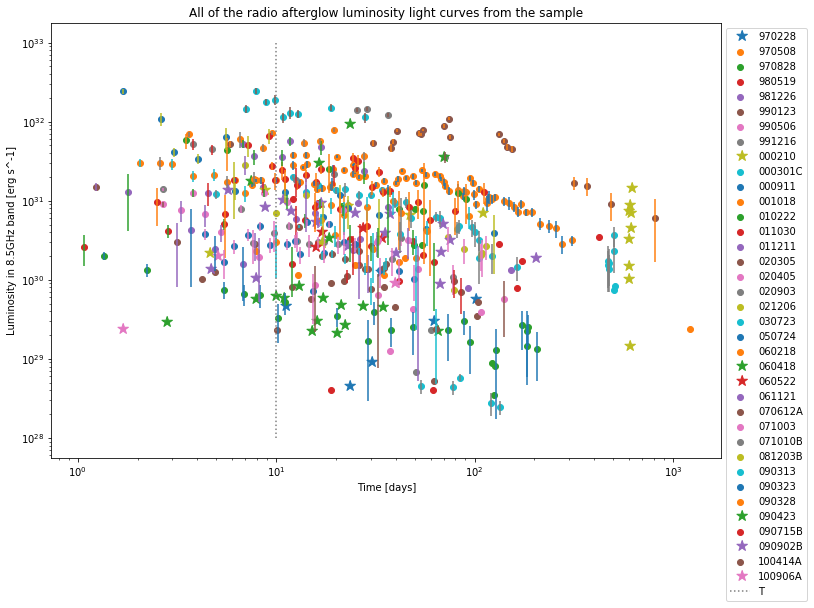

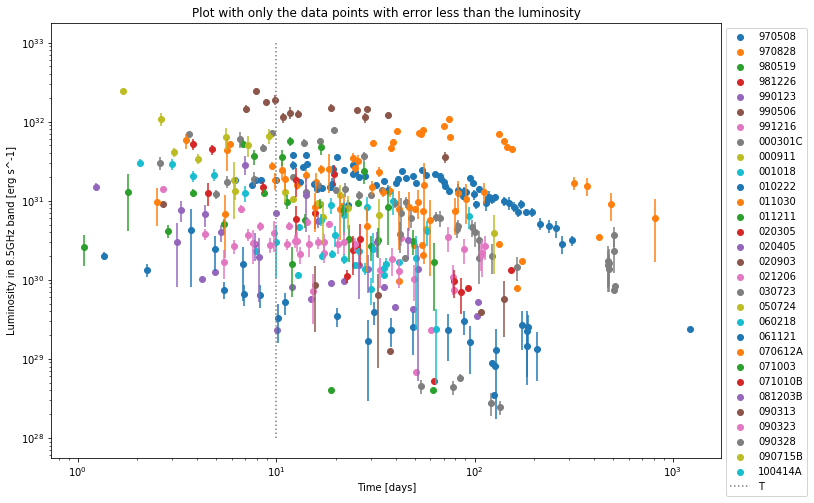

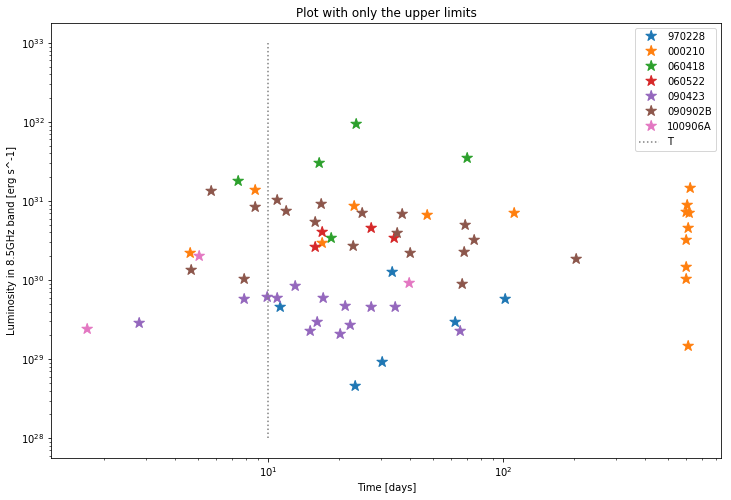

In [223]:
"""
PLOT OF ALL DATA FOR 8.46GHz
"""

# first GRB in the radio data with a redshift
first_GRB =  GRB_name[0] 

# empty arrays to store data
time = []
flux = []
flux_err = []
GRB_plot = []
GRB_plot_f = []
time_all = []
lum_all = []
lum_err_all = []
GRB_all = []
data_all = []

# loop through rows in data for 8.46GHz
for row in data_freq:
    
    # get name of GRB for that row
    GRB = row[0]
    
    # if GRB matches previous, add it to the array
    if re.match(GRB, first_GRB):
        
        # removes points where error is larger than the recorded value
        #if row[2] > row[3]:
            
        # Adds data to array for that GRB
        time.append(row[1])
        flux.append(row[2])
        flux_err.append(row[3])

    
    # when it stops matching, plot the data and reset the arrays  
    else:
        
        if len(flux) >= 3:
            
            # identify redshift and luminosity distance for that GRB
            for j in GRB_z_d_l:
                
                x = j[0]
                
                if re.match(GRB, x):
                    
                    z = j[1]
                    d_l = j[2]
                    
                    # call on luminosity function to plot lum curves
                    lum = L(flux, d_l, z, beta)
                    lum_err = L_err(flux_err, d_l, z, beta)
                    
                    lum_all.append(lum)
                    lum_err_all.append(lum_err)
                    time_all.append(time)
                    GRB_all.append(first_GRB)
                    data_all.append([first_GRB, lum, lum_err, time])
                    
        # reset the arrays
        time = []
        flux = []
        flux_err = []
        
        # move to next GRB
        first_GRB = GRB
        continue
        
# plot scatter graph of all data points
plt.figure(figsize = (12, 8))
plt.title('All of the radio afterglow luminosity light curves from the sample')
plt.xscale("log")
plt.xlabel("Time [days]")
plt.yscale("log")
plt.ylabel("Luminosity in 8.5GHz band [erg s^-1]")

# loop through data and plot each GRB onto the plot
for x in data_all:
    
    # plot point with error bar if error is less than luminosity
    if x[1]>x[2]:
        
        plt.scatter(x[3], x[1], label = f'{x[0]}')
        plt.errorbar(x[3], x[1], yerr = x[2], fmt = ' ')
    
    # plot point as a star if error is more than luminosity
    if x[1]<x[2]:
        
        plt.scatter(x[3], x[1], s=200, marker=r'$\star$', label = f'{x[0]}')

# plot a vertical line to mark on the early time at which luminosity will be taken
plt.vlines(x=10, ymin=1e28, ymax=1e33, colors='grey', linestyles=':', label='T')
plt.legend(bbox_to_anchor = (1 , 1))
plt.show()



# plot scatter graph of data points where error is less than luminosity
plt.figure(figsize = (12, 8))
plt.title('Plot with only the data points with error less than the luminosity')
plt.xscale("log")
plt.xlabel("Time [days]")
plt.yscale("log")
plt.ylabel("Luminosity in 8.5GHz band [erg s^-1]")

# loop through data and plot each GRB onto the plot
for x in data_all:
    
    # plot point with error bar if error is less than luminosity
    if x[1]>x[2]:
        
        plt.scatter(x[3], x[1], label = f'{x[0]}')
        plt.errorbar(x[3], x[1], yerr = x[2], fmt = ' ')

# plot a vertical line to mark on the early time at which luminosity will be taken
plt.vlines(x=10, ymin=1e28, ymax=1e33, colors='grey', linestyles=':', label='T')
plt.legend(bbox_to_anchor = (1 , 1))
plt.show()



# plot scatter graph of data points where error is more than luminosity
plt.figure(figsize = (12, 8))
plt.title('Plot with only the upper limits')
plt.xscale("log")
plt.xlabel("Time [days]")
plt.yscale("log")
plt.ylabel("Luminosity in 8.5GHz band [erg s^-1]")

# loop through data and plot each GRB onto the plot
for x in data_all:
    
    # plot point as a star if error is more than luminosity
    if x[1]<x[2]:
        
        plt.scatter(x[3], x[1], s=200, marker=r'$\star$', label = f'{x[0]}')

# plot a vertical line to mark on the early time at which luminosity will be taken
plt.vlines(x=10, ymin=1e28, ymax=1e33, colors='grey', linestyles=':', label='T')
plt.legend(bbox_to_anchor = (1 , 1))
plt.show()

[4.466102776483265e+29, 4.466102776483265e+28, 8.93220555296653e+28, 1.2281782635328981e+30, 2.902966804714123e+29, 5.582628470604081e+29]
[8.93220555296653e+29, 8.038984997669878e+29, 2.679661665889959e+29, 6.699154164724898e+29, 5.805933609428246e+29, 4.2427976376591026e+29]
[11.0, 22.9, 29.7, 32.9, 60.8, 99.6]


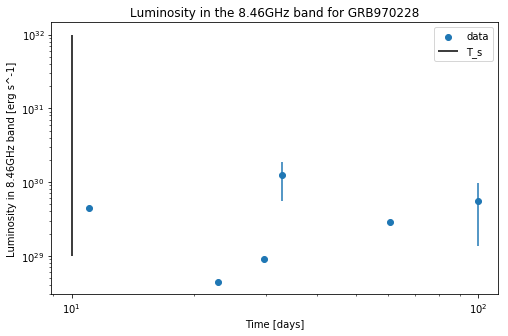

[1.830121253799269e+31, 1.5601033638944588e+31, 1.8061196635855079e+31, 1.8121200611389485e+31, 1.830121253799269e+31, 3.810252446434544e+31, 2.7901848623497054e+31, 1.7101133027304645e+31, 2.6401749235136997e+31, 3.7802504586673427e+31, 2.880190825651309e+31, 1.6501093271960622e+31, 1.410093425058453e+31, 1.4400954128256544e+31, 1.5000993883600565e+31, 1.614106941875421e+31, 2.5051659785612945e+31, 3.600238532064136e+31, 2.430161009143292e+31, 8.700576452488328e+30, 2.1601431192384814e+31, 2.820186850116906e+31, 2.880190825651309e+31, 2.2801510703072864e+31, 2.010133180402476e+31, 2.070137155936878e+31, 1.59010535166166e+31, 1.800119266032068e+31, 1.3800914372912521e+31, 1.6801113149632636e+31, 1.8901252293336713e+31, 2.40015902137609e+31, 1.9351282109844733e+31, 2.0401351681696773e+31, 1.6951123088468641e+31, 2.4151600152596916e+31, 2.1301411314712807e+31, 2.175144113122082e+31, 2.0401351681696773e+31, 1.8901252293336713e+31, 1.725114296614065e+31, 1.5451023700108584e+31, 1.320087461

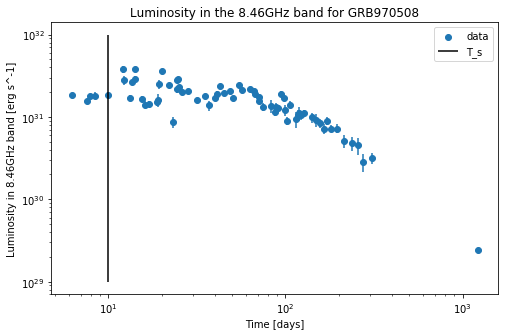

[5.776815011254669e+31, 4.322786743115739e+31, 2.554373984568391e+31, 8.645573486231477e+30, 7.859612260210435e+30, 2.750864291073652e+30, 7.859612260210435e+30, 2.750864291073652e+30, 7.466631647199912e+30, 1.571922452042087e+31, 1.2575379616336694e+31, 1.0610476551284086e+31]
[1.2968360229347216e+31, 1.9649030650526085e+31, 1.2968360229347216e+31, 1.1789418390315652e+31, 5.501728582147304e+30, 7.07365103418939e+30, 8.252592873220956e+30, 8.252592873220956e+30, 1.9649030650526085e+31, 1.414730206837878e+31, 5.108747969136783e+30, 5.501728582147304e+30]
[3.53, 5.62, 18.45, 21.37, 41.39, 49.32, 49.99, 54.5, 55.26, 55.5, 82.25, 90.25]


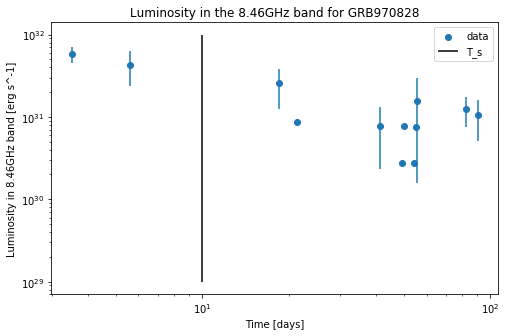

[2.5605550757987296e+30, 4.12089332511358e+30, 5.081101478538104e+30, 1.600346922374206e+30, 5.681231574428432e+30, 9.201994803651685e+30, 4.000867305935515e+28, 3.280711190867123e+30, 2.64057242191744e+30, 3.120676498629702e+30, 4.000867305935515e+28, 1.6803642684929165e+30]
[1.0802341726025892e+30, 7.601647881277479e+29, 8.00173461187103e+29, 1.0002168264838787e+30, 1.1602515187212994e+30, 1.2402688648400097e+30, 1.2802775378993648e+30, 1.600346922374206e+30, 9.201994803651685e+29, 1.0802341726025892e+30, 1.2002601917806546e+30, 1.2802775378993648e+30]
[1.08, 2.84, 5.45, 12.03, 14.05, 16.63, 18.92, 23.43, 30.07, 48.75, 61.72, 62.74]


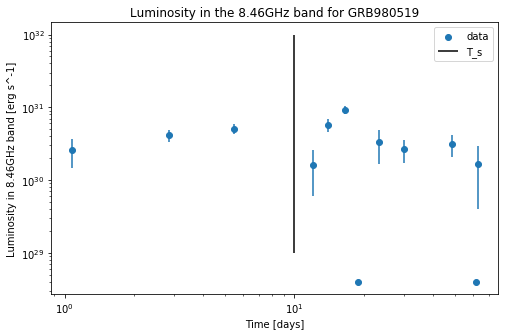

[1.262561752622953e+31, 1.4921184349180354e+31, 5.915499120680968e+30, 7.063282532156379e+30, 2.3838578546027783e+30, 3.2667681711223257e+30, 7.946192848675927e+29, 1.324365474779321e+30]
[3.973096424337964e+30, 2.472148886254733e+30, 2.560439917906688e+30, 2.648730949558642e+30, 1.2360744431273666e+30, 1.7658206330390948e+30, 2.2072757912988685e+30, 1.7658206330390948e+30]
[4.54, 8.54, 12.57, 15.65, 24.48, 26.44, 92.33, 152.03]


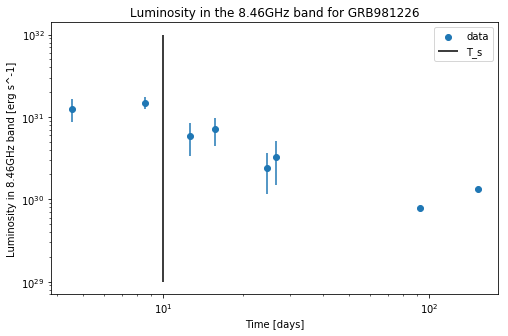

[1.4916795161457065e+31, 3.0407313213739404e+30, 1.0327012034854892e+30, 1.2621903598155978e+30, 2.8112421650438316e+30, 2.2948915633010867e+29, 8.032120471553806e+29, 5.7372289082527186e+29, 9.179566253204347e+29, 9.75328914402962e+29, 1.549051805228234e+30, 1.3769349379806523e+30, 8.032120471553806e+29, 4.589783126602173e+29, 3.442337344951631e+29, 5.163506017427446e+29]
[1.8359132506408693e+30, 2.2375192742185602e+30, 1.4343072270631793e+30, 1.4343072270631793e+30, 1.0900734925680162e+30, 1.491679516145707e+30, 9.179566253204347e+29, 1.319562648898125e+30, 9.179566253204347e+29, 1.0327012034854892e+30, 9.75328914402962e+29, 6.884674689903262e+29, 8.032120471553806e+29, 7.458397580728535e+29, 5.7372289082527186e+29, 5.7372289082527186e+29]
[1.24, 3.17, 4.21, 4.91, 7.86, 10.11, 12.02, 14.95, 18.96, 22.03, 26.02, 28.93, 34.96, 39.86, 102.88, 104.0]


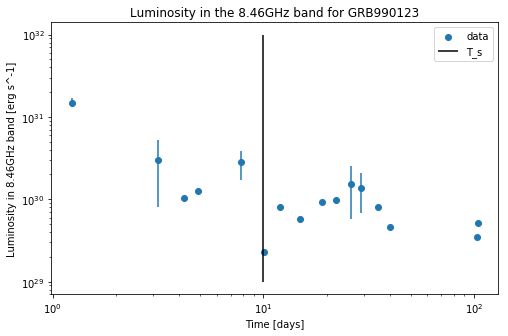

[9.020293423898856e+30, 8.53900410179754e+29, 6.365439421339984e+29, 1.2420369602614603e+29, 3.881365500817063e+29, 5.744420941209254e+29]
[6.986457901470715e+29, 6.365439421339984e+29, 5.589166321176572e+29, 4.812893221013159e+29, 4.657638600980476e+29, 3.881365500817063e+29]
[2.7, 15.66, 32.56, 37.52, 108.35, 141.23]


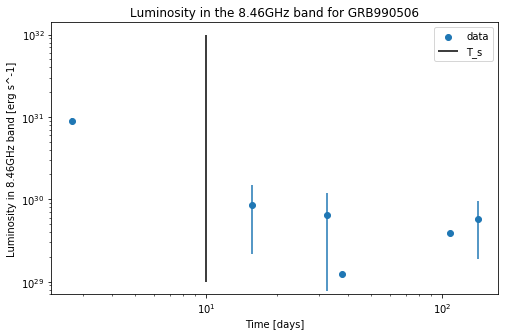

[1.3953704400974054e+31, 7.884877445690446e+30, 2.9194735731856753e+30, 3.9079567515083846e+30, 4.850463968048642e+30, 3.126365401206707e+30, 2.827521649620772e+30, 2.9884375158593523e+30, 3.011425496750579e+30, 2.827521649620772e+30, 1.8160504904068376e+30, 3.402221171901417e+30, 6.896394267367737e+28, 2.298798089122579e+29, 1.0804351018876121e+30]
[7.356153885192252e+29, 9.884831783227088e+29, 1.3333028916910959e+30, 1.6551346241682568e+30, 5.7469952228064465e+29, 8.505552929753542e+29, 8.965312547578058e+29, 5.057355796069673e+29, 8.275673120841284e+29, 6.896394267367737e+29, 7.126274076279994e+29, 7.58603369410451e+29, 6.896394267367737e+29, 5.51711541389419e+29, 4.3677163693329e+29]
[2.68, 6.63, 7.62, 9.73, 11.57, 12.76, 14.59, 16.34, 17.44, 20.48, 38.28, 42.49, 50.51, 60.4, 78.18]


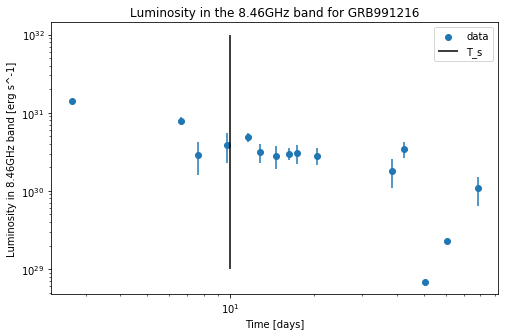

[2.1459075383097622e+30, 1.3304626737520526e+31, 2.861210051079683e+30, 8.29750914813108e+30, 6.437722614929286e+30, 6.866904122591238e+30, 1.0014235178778891e+30, 1.4306050255398415e+30, 7.153025127699207e+30, 3.147331056187651e+30, 8.583630153239049e+30, 1.4306050255398414e+29, 4.434875579173508e+30, 6.866904122591238e+30, 1.4019929250290446e+31]
[5.293238594497414e+30, 3.004270553633667e+30, 2.2889680408637462e+30, 4.7209965842814766e+30, 6.437722614929286e+30, 3.7195730664035877e+30, 4.2918150766195243e+30, 7.296085630253193e+30, 4.14875457406554e+30, 3.147331056187651e+30, 5.007117589389446e+30, 3.147331056187651e+30, 4.7209965842814766e+30, 4.434875579173508e+30, 5.579359599605382e+30]
[4.54, 8.59, 16.59, 22.56, 46.45, 108.37, 584.04, 584.95, 585.95, 588.98, 593.93, 595.92, 599.92, 600.93, 609.93]


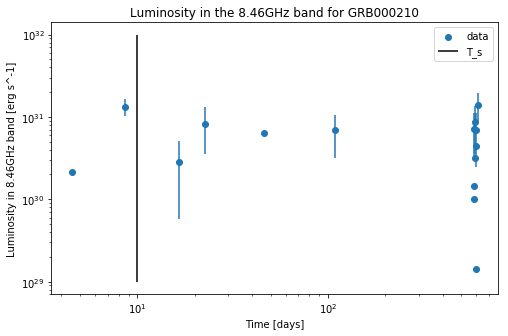

[1.206110909031233e+31, 2.0157493739172505e+31, 1.302098974455864e+31, 1.58588977658086e+31, 1.3521797042426282e+31, 1.410607222327186e+31, 1.1727237558400568e+31, 1.1727237558400568e+31, 1.356353098391525e+31, 9.473604717996188e+30, 3.797788675496269e+30, 9.72400836693001e+30, 6.051421515900649e+30, 6.2600912233455e+30, 6.009687574411679e+30, 4.382063856341849e+30, 4.75766932974258e+30, 4.5907335637867e+30, 4.0064583829411193e+30, 1.87802736700365e+30, 3.21351349465069e+30, 2.0032291914705596e+30, 1.46068795211395e+30, 1.5441558350918897e+30, 1.7110916010477697e+30, 1.37722006913601e+30, 1.62762371806983e+30, 7.512109468014599e+29, 2.29536678189335e+30, 3.630852909540389e+30, 8.346788297794e+29]
[1.4189540106249798e+30, 1.08508247871322e+30, 2.58750437231614e+30, 1.2102843031801299e+30, 1.5024218936029198e+30, 2.87964196273893e+30, 1.4189540106249798e+30, 1.0433485372242498e+30, 1.12681642020219e+30, 1.37722006913601e+30, 1.5858897765808598e+30, 1.5441558350918897e+30, 1.5024218936029

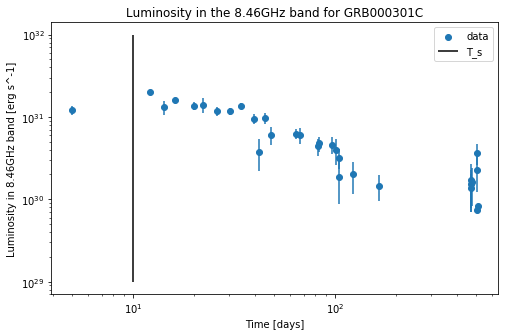

[4.119236248315526e+31, 3.4080012126351473e+31, 1.3335656919007097e+31, 1.3039308987473607e+31, 6.223306562203313e+30, 1.1853917261339642e+31, 8.00139415140426e+30, 6.667828459503548e+30, 4.445218973002366e+30, 3.8525231099353843e+30]
[5.334262767602839e+30, 5.037914836069348e+30, 3.2598272468684017e+30, 3.7043491441686377e+30, 3.4080012126351466e+30, 3.8525231099353843e+30, 3.556175178401893e+30, 3.8525231099353843e+30, 4.445218973002366e+30, 2.6671313838014195e+30]
[3.06, 4.06, 6.19, 11.05, 17.2, 20.92, 22.93, 32.94, 57.08, 125.78]


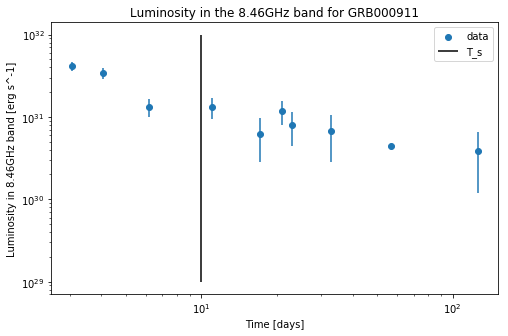

[3.03182098126891e+31, 8.758593945887962e+30, 8.309435281996272e+30, 9.806630828301907e+30, 4.117287752340495e+30, 6.363081071798947e+30]
[3.742988865764086e+30, 1.9463542101973253e+30, 2.844671537980706e+30, 3.2189704245571143e+30, 1.422335768990353e+30, 2.0212139875126068e+30]
[2.05, 18.94, 28.85, 38.78, 57.71, 93.77]


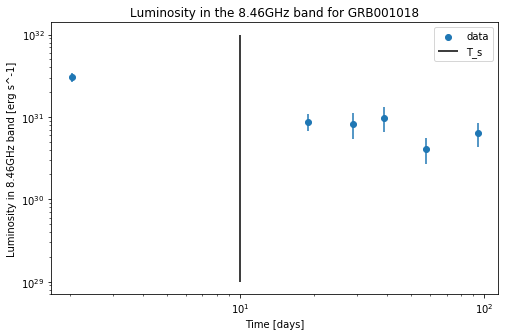

[2.0042346692438293e+30, 1.3167355675846088e+30, 7.457617373930526e+29, 6.641940473656876e+29, 6.467152566455379e+29, 3.262707601094606e+29, 5.185374580311069e+29, 3.4957581440299345e+29, 1.689616436281135e+29, 3.961859229900592e+29, 2.33050542935329e+29, 2.5052933365547866e+29, 2.33050542935329e+29, 3.0296570581592768e+29, 1.631353800547303e+29, 8.739395360074836e+28, 3.4957581440299345e+28, 8.156769002736515e+28, 1.2817779861443094e+29, 2.680081243756283e+29, 2.2722427936194578e+29, 1.4565658933458058e+29, 2.5052933365547866e+29, 1.3400406218781415e+29]
[2.2722427936194578e+29, 2.447030700820954e+29, 1.8061417077487994e+29, 1.922666979216464e+29, 2.0974548864179607e+29, 1.689616436281135e+29, 1.631353800547303e+29, 9.322021717413158e+28, 1.3983032576119738e+29, 1.2817779861443094e+29, 9.322021717413158e+28, 1.3983032576119738e+29, 1.3983032576119738e+29, 1.0487274432089804e+29, 9.90464807475148e+28, 1.1069900789428125e+29, 5.826263573383225e+28, 1.223515350410477e+29, 1.1069900789428

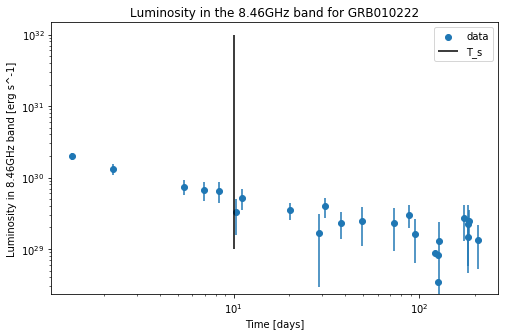

[9.694818116067357e+30, 6.834052114604859e+30, 2.765407134747082e+31, 1.8118184675929161e+31, 2.4634373901482627e+31, 1.8753910454031937e+31, 1.5734213008043744e+31, 2.097895067739166e+31, 8.26443511533611e+30, 1.7482458897826383e+31, 2.5111168235059714e+31, 7.787640781759024e+30, 7.62870933723333e+30, 3.480598635112707e+31, 2.5587962568636793e+31, 3.2104151794190263e+31, 4.767943335770831e+30, 1.4939555785415273e+31, 2.3045059456225685e+31, 1.2873447006581245e+31, 1.3191309895632635e+31, 9.535886671541663e+29, 8.423366559861804e+30, 9.694818116067357e+30, 2.0661087788340274e+30, 5.721532002924998e+30, 7.310846448181942e+30, 1.2873447006581245e+31, 2.860766001462499e+30, 7.94657222628472e+29, 1.7482458897826383e+30, 3.4964917795652766e+30]
[4.926874780296525e+30, 4.926874780296525e+30, 3.178628890513888e+30, 4.291149002193749e+30, 6.357257781027776e+30, 5.562600558399304e+30, 2.2250402233597217e+30, 3.814354668616665e+30, 4.291149002193749e+30, 4.926874780296525e+30, 3.4964917795652766

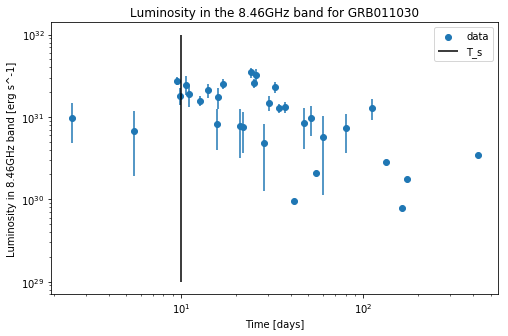

[1.2814137902737093e+31, 5.194920771379902e+31, 3.636444539965931e+31, 3.532546124538334e+31, 5.645147238232827e+31, 4.710061499384445e+31, 9.350857388483825e+30, 2.3550307496922223e+31, 8.311873234207843e+30]
[8.65820128563317e+30, 5.887576874230556e+30, 7.965545182782517e+30, 7.965545182782517e+30, 7.61921713135719e+30, 9.350857388483825e+30, 9.697185439909152e+30, 7.272889079931864e+30, 5.541248822805228e+30]
[1.79, 6.78, 7.72, 10.75, 11.79, 16.79, 25.79, 27.62, 36.68]


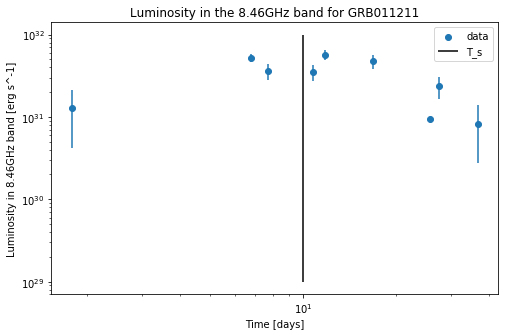

[1.1226251313350345e+30, 5.169984157463976e+28, 9.601399149575954e+29, 7.090263987379166e+29]
[2.2157074960559893e+29, 3.692845826759982e+29, 3.692845826759982e+29, 3.397418160619183e+29]
[22.89, 62.8, 78.57, 85.7]


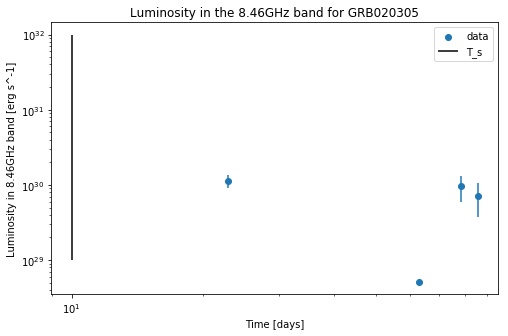

[7.608336466606198e+30, 6.762965748094397e+30, 3.962675243024061e+30, 1.954919786558537e+30, 5.600581010140674e+30, 3.0116331846982865e+30, 3.1701401944192486e+30, 4.226853592558998e+29, 1.3737274175816746e+30]
[2.2719338060004617e+30, 2.1662624661864867e+30, 9.510420583257748e+29, 1.4265630874886622e+30, 1.0567133981397497e+30, 1.0567133981397497e+30, 1.320891747674687e+30, 1.1095490680467372e+30, 1.320891747674687e+30]
[3.33, 4.37, 5.25, 8.21, 16.25, 32.21, 46.13, 49.14, 52.16]


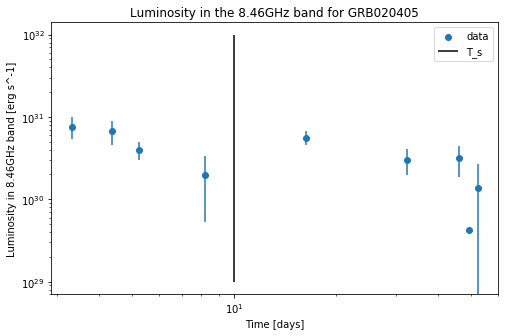

[1.4027750080585519e+32, 1.4385025216686223e+32, 1.2034530900234226e+32, 3.572751361007036e+31]
[6.957463176697912e+30, 7.70962135796255e+30, 7.521581812646391e+30, 5.641186359484794e+30]
[25.69, 28.65, 36.72, 70.6]


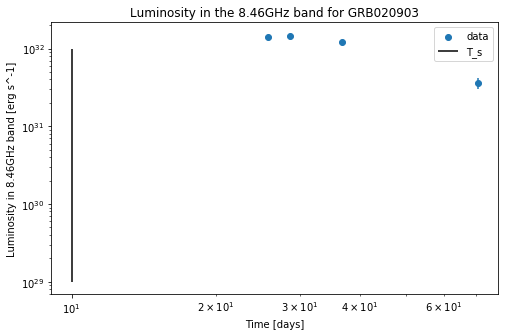

[3.428437675254613e+30, 7.394669495647203e+29, 2.420073653120903e+30, 2.050340178338543e+30, 2.1511765805519139e+30, 2.655358591618769e+30]
[1.2100368265604515e+30, 1.1764246924893279e+30, 8.403033517780912e+29, 7.73079083635844e+29, 1.0755882902759569e+30, 8.739154858492151e+29]
[73.5, 78.44, 88.47, 107.5, 109.61, 113.61]


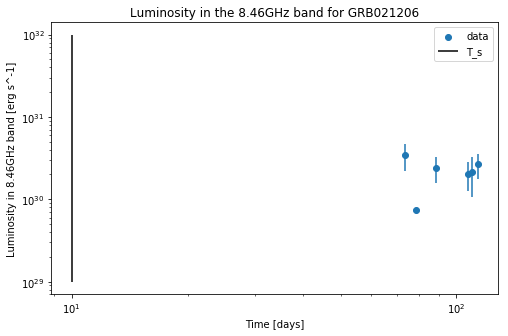

[4.475179479462871e+28, 4.343556553596316e+28, 5.76508415295511e+28, 2.7640814431976555e+28, 2.448186421117924e+28]
[8.950358958925741e+27, 8.423867255459522e+27, 5.791408738128421e+27, 8.950358958925741e+27, 5.001671182929091e+27]
[54.01, 77.92, 84.86, 120.77, 134.77]


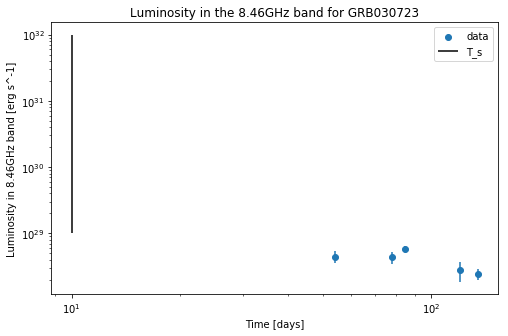

[2.4074104921990557e+32, 1.076863187908395e+32, 6.316216775231931e+31]
[1.50139579083382e+31, 2.0708907459776826e+31, 1.9155739400293564e+31]
[1.69, 2.62, 5.56]


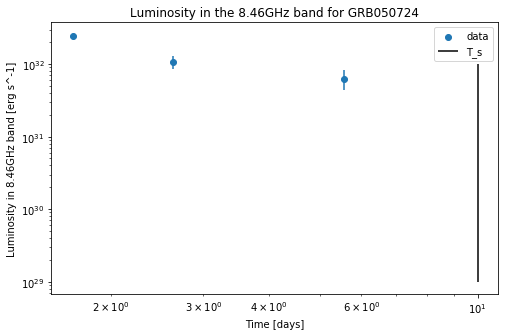

[2.900347628245711e+31, 2.0477519999950037e+31, 2.1314890706267696e+31, 1.2484435985099648e+31, 2.283738289957253e+30, 2.968859776944429e+30, 1.1418691449786264e+30, 5.709345724893132e+30, 3.653981263931605e+30, 6.622841040876032e+30, 1.5224921933048354e+30, 2.4359875092877366e+30, 1.1418691449786264e+30, 1.674741412635319e+30, 1.903115241631044e+30]
[4.567476579914506e+30, 3.0449843866096707e+30, 3.577856654266363e+30, 2.968859776944429e+30, 2.283738289957253e+30, 1.903115241631044e+30, 1.1418691449786264e+30, 9.896199256481432e+29, 1.0657445353133847e+30, 2.968859776944429e+30, 1.5224921933048354e+30, 1.5224921933048354e+30, 1.370242973974352e+30, 1.674741412635319e+30, 1.674741412635319e+30]
[3.0, 3.83, 4.85, 6.97, 7.94, 9.95, 12.88, 16.74, 19.86, 21.96, 24.91, 30.71, 34.81, 41.74, 50.7]


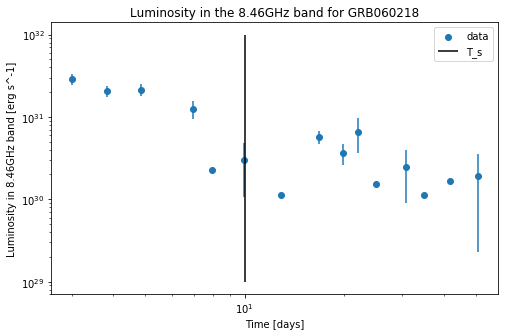

[1.7208354287067012e+31, 2.9500035920686306e+31, 3.277781768965145e+30, 9.095844408878277e+31, 3.4416708574134024e+31]
[5.490284463016618e+31, 3.6875044900857883e+31, 2.7861145036203733e+31, 3.8513935785340447e+31, 2.7861145036203733e+31]
[7.29, 16.02, 18.07, 23.04, 68.29]


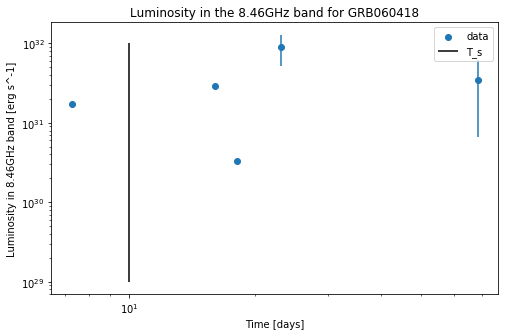

[2.532757438567469e+30, 3.9574334977616704e+30, 4.4323255174930715e+30, 3.324244138119803e+30]
[4.5906228574035383e+30, 4.115730837672138e+30, 3.7991361578512036e+30, 4.4323255174930715e+30]
[15.52, 16.6, 26.68, 33.45]


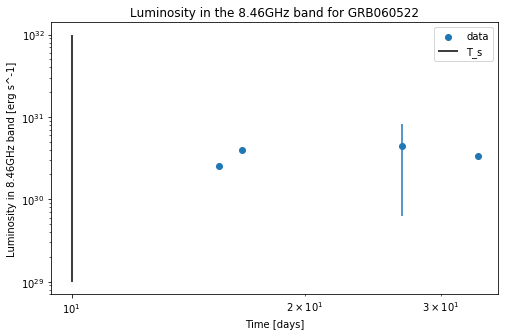

[4.322747231866093e+30, 2.431545317924678e+30, 1.5760015949511798e+30]
[3.512232125891201e+30, 1.1257154249651284e+30, 1.0356581909679182e+30]
[3.72, 4.9, 6.77]


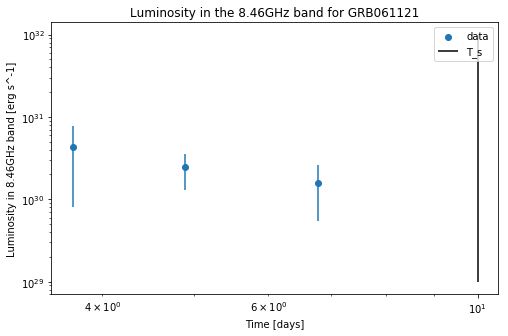

[5.229425733571293e+31, 5.406995367987975e+31, 4.687838348600413e+31, 5.5579295572421555e+31, 7.724279097125679e+31, 7.129420821829794e+31, 6.880823333646438e+31, 7.839699359496521e+31, 8.736426013300767e+31, 1.092053251662596e+32, 6.339235948675558e+31, 6.916337260529774e+31, 5.726620709938004e+31, 4.803258610971256e+31, 4.554661122787901e+31, 1.6869115269584818e+31, 1.5448558194251356e+31, 8.967266538042455e+30, 6.037367570167197e+30]
[4.794380129250422e+30, 4.794380129250422e+30, 5.771013118542173e+30, 3.9953167743753515e+30, 4.261671226000374e+30, 5.41587384970881e+30, 2.130835613000187e+30, 3.1074686022919403e+30, 5.41587384970881e+30, 3.7289623227503284e+30, 3.7289623227503284e+30, 3.5513926883336453e+30, 3.6401775055419866e+30, 3.9953167743753515e+30, 3.817747139958669e+30, 3.285038236708622e+30, 3.817747139958669e+30, 3.4626078711253047e+30, 4.3504560432087153e+30]
[5.82, 30.89, 37.87, 38.85, 40.64, 52.79, 53.64, 54.77, 70.53, 74.66, 75.64, 133.16, 140.33, 146.34, 154.42, 317.0

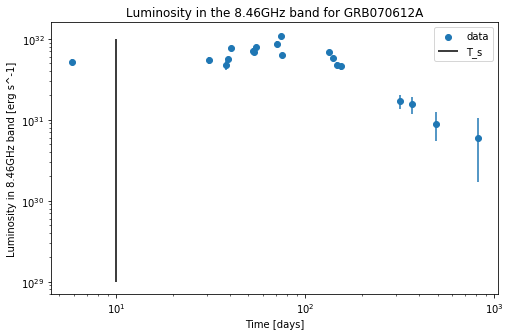

[1.2590806034901865e+31, 1.2620086979169077e+31, 9.721273496714929e+30, 7.613045509475546e+30, 3.191622925126286e+30]
[1.464047213360682e+30, 1.4933281576278958e+30, 1.9618232659033137e+30, 1.229799659222973e+30, 1.317642492024614e+30]
[3.82, 8.72, 11.3, 21.66, 32.68]


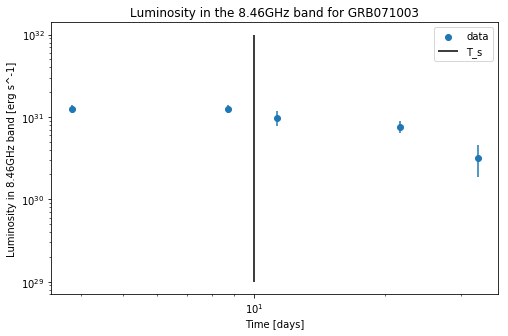

[5.269115456818975e+31, 4.4707646300282215e+31, 1.8521739181545487e+31, 2.17151424887085e+31, 2.7143928110885625e+30]
[8.302848598623839e+30, 6.38680661432603e+30, 7.344827606474934e+30, 6.38680661432603e+30, 7.504497771833086e+30]
[3.79, 4.75, 12.62, 19.53, 25.62]


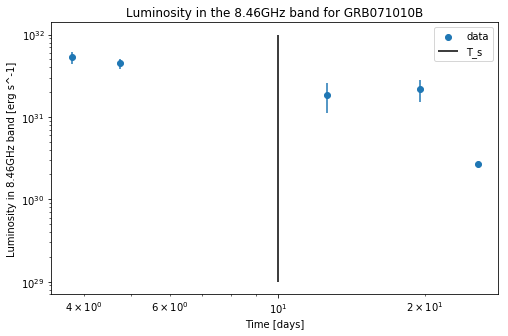

[2.8685292184627926e+31, 6.905718488891908e+30, 1.1686600519663226e+31]
[7.791067013108819e+30, 7.08278819373529e+30, 7.613997308265437e+30]
[6.96, 10.04, 14.09]


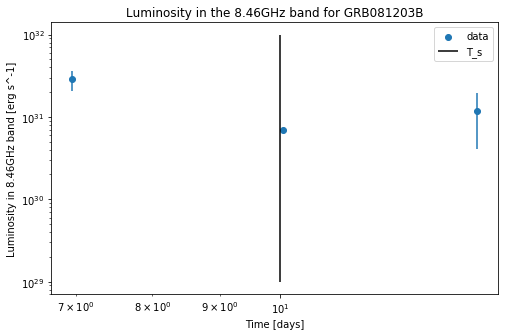

[1.443557274354578e+32, 2.452769882089194e+32, 1.7799614769327834e+32, 1.8864185030651268e+32, 1.1284444770028411e+32, 1.2987757188145908e+32, 1.260451189406947e+32, 1.5031732089886902e+32, 1.1284444770028411e+32]
[1.6607296076645588e+31, 1.8736436599292454e+31, 1.745895228570433e+31, 2.597551437629181e+31, 1.745895228570433e+31, 2.214306143552745e+31, 1.5755639867586838e+31, 1.5755639867586838e+31, 1.745895228570433e+31]
[7.01, 7.87, 8.9, 9.88, 10.88, 11.73, 12.93, 18.83, 28.06]


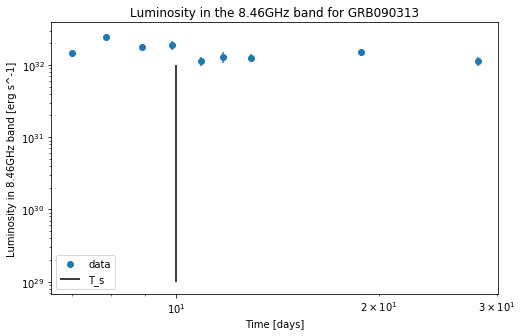

[3.8234011650354425e+30, 1.6992894066824186e+30, 2.667884368491398e+30, 3.7214438006344976e+30, 4.775003232777597e+30, 2.786834626959167e+30, 2.820820415092816e+30, 3.109699614228827e+30, 2.0901259702193753e+30, 5.301782948849148e+30, 7.306944448734402e+29, 2.158097546486672e+30, 5.012903749713137e+30, 3.024735143894705e+30, 2.8378133091596395e+30, 1.325445737212287e+30, 1.3084528431454625e+30, 1.0365665380762756e+30]
[5.947512923388466e+29, 6.797157626729676e+29, 5.267797160715499e+29, 6.627228686061435e+29, 6.457299745393192e+29, 5.947512923388466e+29, 4.588081398042532e+29, 5.947512923388466e+29, 4.927939279379016e+29, 4.588081398042532e+29, 4.588081398042532e+29, 5.097868220047257e+29, 4.588081398042532e+29, 9.516020677421546e+29, 5.6076550420519814e+29, 5.437726101383741e+29, 5.267797160715499e+29, 4.927939279379016e+29]
[4.38, 5.43, 6.16, 7.18, 8.32, 9.3, 11.29, 12.41, 13.14, 14.28, 15.42, 17.44, 18.42, 22.09, 25.04, 33.46, 41.41, 49.35]


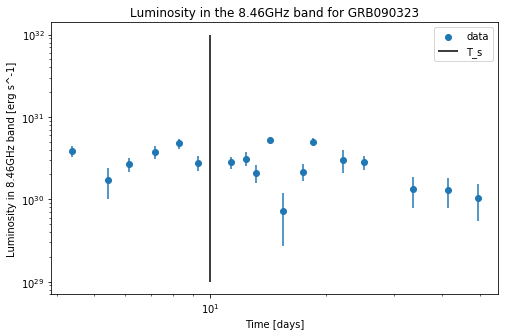

[3.0060441549159328e+31, 6.984369653706752e+31, 1.7394024041798423e+31, 6.0120883098318655e+31, 1.9088826384332625e+31, 4.665166448133628e+31, 7.216289974264064e+31, 5.37876743446382e+31, 5.735567927628915e+31, 7.903130923606873e+31, 3.6572050549422323e+31, 6.957609616719369e+30, 1.873202589116753e+30]
[5.352007397476438e+30, 5.084407027602615e+30, 3.032804191903314e+30, 1.3826019110147464e+31, 3.657205054942232e+30, 5.084407027602615e+30, 3.4788048083596844e+30, 5.976408260515355e+30, 5.262807274185163e+30, 5.173607150893889e+30, 5.262807274185163e+30, 3.8356053015247806e+30, 5.708807890641533e+30]
[2.59, 3.62, 5.63, 6.61, 7.69, 8.62, 9.57, 13.74, 16.6, 19.59, 27.57, 42.56, 44.46]


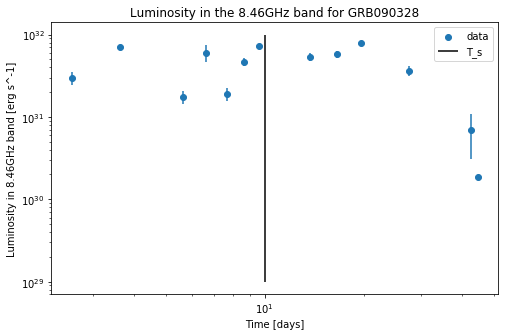

[2.8087940936480824e+29, 5.58236819866108e+29, 5.9785930708057944e+29, 5.7672731389952796e+29, 8.135817374704792e+29, 2.192444292534083e+29, 2.8968440652357965e+29, 5.7144431560426505e+29, 2.042759340834969e+29, 4.6138185111962234e+29, 2.632694150472654e+29, 4.464133559497109e+29, 4.411303576544481e+29, 2.192444292534083e+29]
[3.460363883397167e+29, 1.910684383453398e+29, 1.646534468690255e+29, 1.910684383453398e+29, 1.998734355041112e+29, 1.699364451642884e+29, 1.681754457325341e+29, 1.681754457325341e+29, 1.699364451642884e+29, 2.042759340834969e+29, 1.3119445766569412e+29, 1.593704485737627e+29, 1.6729494601665694e+29, 1.8138294147069123e+29]
[2.75, 7.7, 9.71, 10.67, 12.7, 14.76, 15.76, 16.75, 19.69, 20.76, 21.71, 26.81, 33.79, 63.75]


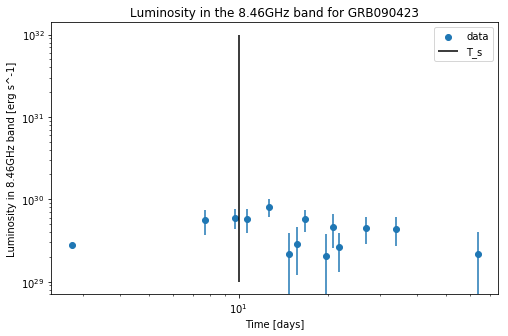

[1.8267049327605964e+31, 5.0427347439588295e+31, 6.6121572918235675e+31, 1.0548577780730203e+31, 9.262165856250912e+30]
[1.2349554475001214e+31, 1.4922378323959802e+31, 1.4665095939063942e+31, 2.572823848958586e+31, 1.0548577780730203e+31]
[6.11, 7.25, 9.19, 12.1, 16.27]


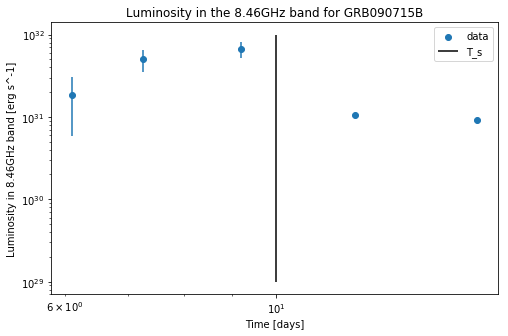

[1.3151423098539607e+30, 1.3151423098539606e+31, 1.0116479306568927e+30, 8.093183445255142e+30, 1.0015314513503239e+31, 7.182700307663938e+30, 5.260569239415843e+30, 9.003666582846343e+30, 2.6302846197079214e+30, 6.77804113540118e+30, 3.8442621364961926e+30, 6.676876342335491e+30, 2.1244606543794747e+30, 8.700172203649277e+29, 2.2053924888320264e+30, 4.8862595050727915e+30, 3.125992105729799e+30, 1.820966275182407e+30]
[3.136108585036367e+30, 3.439602964233435e+30, 3.2372733781020565e+30, 3.2372733781020565e+30, 3.136108585036367e+30, 3.3384381711677456e+30, 3.2372733781020565e+30, 3.641932550364814e+30, 2.933778998904989e+30, 2.933778998904989e+30, 2.832614205839299e+30, 2.7314494127736106e+30, 3.136108585036367e+30, 2.0131793820072165e+30, 1.9423640268612338e+30, 1.9625969854743716e+30, 2.1244606543794747e+30, 1.6186366890510282e+30]
[4.59, 5.59, 7.69, 8.59, 10.64, 11.6, 15.5, 16.46, 22.51, 24.5, 34.43, 36.43, 39.23, 65.44, 66.31, 67.54, 73.42, 199.16]


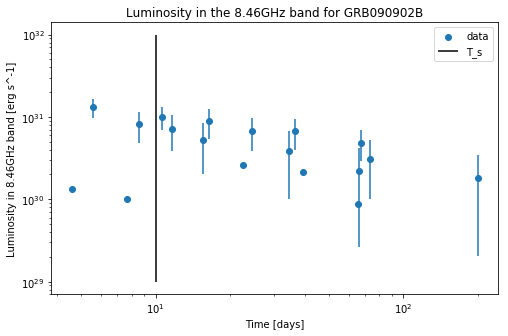

[4.6925328054880034e+30, 2.0026213235542236e+30, 2.1211196267231127e+30, 1.8485735294346682e+30, 2.287017251159557e+30, 1.386430147076001e+30, 7.702389705977782e+29, 1.4101298077097787e+30, 1.599727092780001e+30, 2.3699660633777796e+29]
[1.7774745475333345e+29, 2.2514677602088904e+29, 2.6069626697155576e+29, 2.4884643665466684e+29, 2.3699660633777796e+29, 2.4884643665466684e+29, 2.843959276053335e+29, 2.6069626697155576e+29, 2.7254609728844464e+29, 1.8959728507022233e+29]
[13.08, 17.1, 19.18, 22.11, 26.06, 28.16, 30.01, 35.01, 35.97, 64.11]


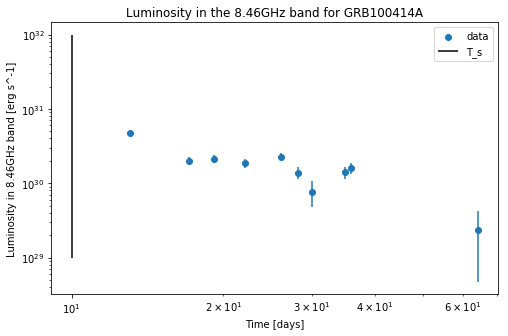

[2.3446482011376933e+29, 1.9388437047869386e+30, 8.891627408929866e+29]
[2.7053633090050306e+29, 2.525005755071362e+29, 2.2544694241708585e+29]
[1.66, 4.97, 38.87]


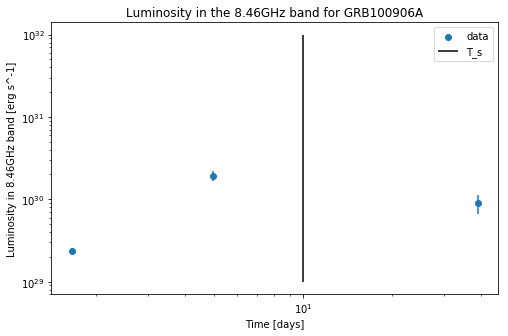

37


In [224]:
"""
FLUX AND LUMINOSITY CURVES (8GHz)
"""

# first GRB in the radio data with a redshift
first_GRB =  GRB_name[0] 

# empty arrays to store data
time = []
flux = []
flux_err = []
GRB_plot = []
GRB_plot_f = []
time_all = []
lum_all = []
lum_err_all = []
data_all = []

# loop through rows in data for 8GHz
for row in data_freq:
    
    # get name of GRB for that row
    GRB = row[0]
    
    # if GRB matches previous, add it to the array
    if re.match(GRB, first_GRB):
            
        # Adds data to array for that GRB
        time.append(row[1])
        flux.append(row[2])
        flux_err.append(row[3])

    
    # when it stops matching, plot the data and reset the arrays  
    else:
        
        if len(flux) >= 3:
            
            """
            # plot scatter graph of the individual flux curves
            f = plt.figure()
            f.set_figwidth(8) 
            f.set_figheight(5)
            plt.title(f'Flux in the 8GHz band for GRB{first_GRB}')
            plt.scatter(time, flux, label=flux)
            plt.errorbar(time, flux, yerr = flux_err, fmt = ' ')
            plt.xscale("log")
            plt.xlabel("Time [days]")
            plt.yscale("log")
            plt.ylabel(r'Flux in 8.5GHz band [$\mu$Jy]')
            plt.legend()
            plt.show()
            """
            
            #print(flux)
            #print(flux_err)
            
            # adds GRB to list if flux curve is plot
            GRB_plot_f.append(first_GRB)
            
            # identify redshift and luminosity distance for that GRB
            for j in GRB_z_d_l:
                
                x = j[0]
                
                if re.match(GRB, x):
                    
                    z = j[1]
                    d_l = j[2]
                    
                    # call on luminosity function to plot lum curves
                    lum = L(flux, d_l, z, beta)
                    lum_err = L_err(flux_err, d_l, z, beta)
                    
                    print(lum)
                    print(lum_err)
                    print(time)
                    
                    # plot scatter graph of the individual luminosity curves
                    f = plt.figure()
                    f.set_figwidth(8) 
                    f.set_figheight(5)
                    plt.title(f'Luminosity in the 8.46GHz band for GRB{first_GRB}')
                    plt.scatter(time, lum, label='data')
                    plt.errorbar(time, lum, yerr = lum_err, fmt = ' ')
                    plt.xscale("log")
                    plt.xlabel("Time [days]")
                    plt.yscale("log")
                    plt.ylabel("Luminosity in 8.46GHz band [erg s^-1]")
                    plt.vlines(x=10, ymin=1e29, ymax=1e32, colors='black', linestyles='solid', label='T_s')
                    plt.legend()
                    plt.show()
                    
                    #print(lum)
                    #print(lum_err)
                    #print(time)
                    
                    # adds GRB to list if luminosity curve is plot
                    GRB_plot.append(first_GRB)
                    
        # reset the arrays
        time = []
        flux = []
        flux_err = []
        
        # move to next GRB
        first_GRB = GRB
        continue

print(len(GRB_plot))

In [16]:
"""
NO. OF GRBS PLOT
"""

# empty lists
no_GRB = []

# names of all GRBs with 8GHz curve
for GRB in GRB_plot:
    if GRB not in no_GRB:
        no_GRB.append(GRB)

print("8GHz GRBs:")
print(no_GRB)

print("The number of GRBs with 8GHz lightcurves is", len(no_GRB))


8GHz GRBs:
['970508', '970828', '980519', '981226', '990123', '990506', '991216', '000210', '000301C', '000911', '001018', '010222', '011030', '011211', '020305', '020405', '020903', '021206', '030723', '050724', '060218', '061121', '070612A', '071003', '071010B', '090313', '090323', '090328', '090423', '090715B', '090902B', '100414A']
The number of GRBs with 8GHz lightcurves is 32


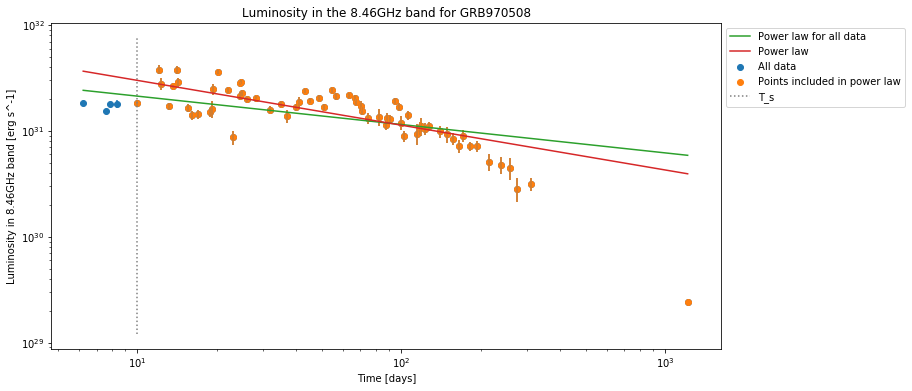

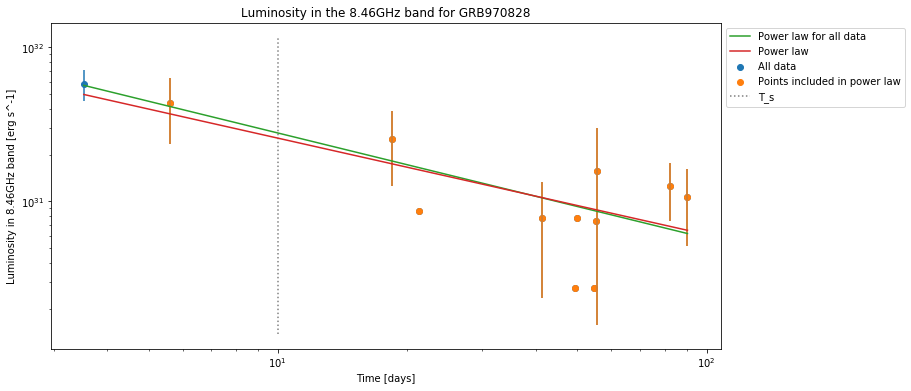

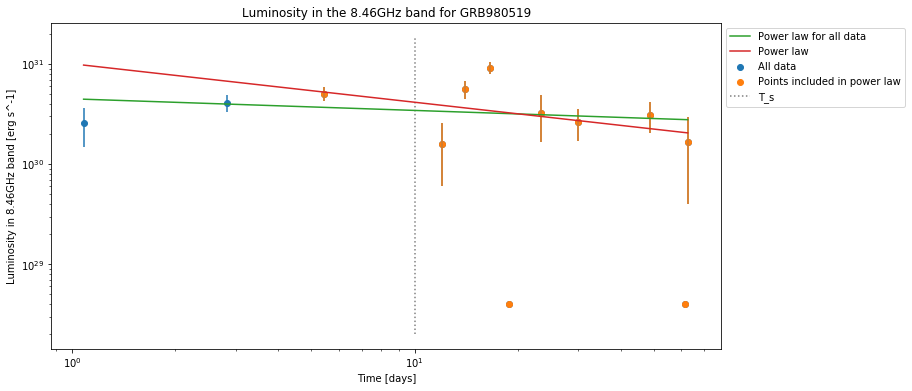

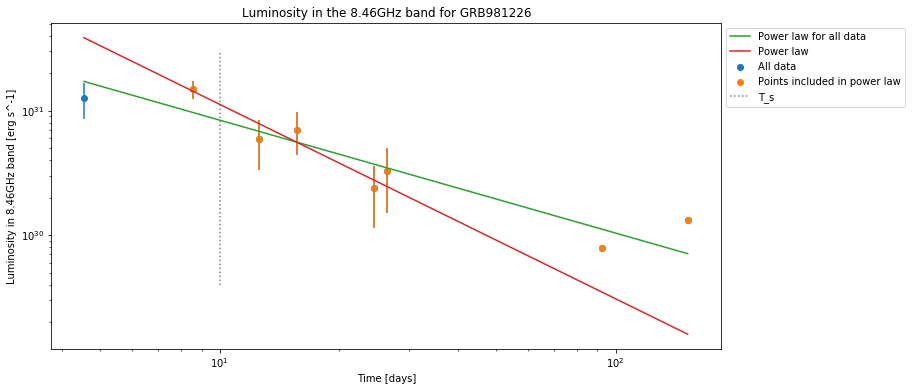

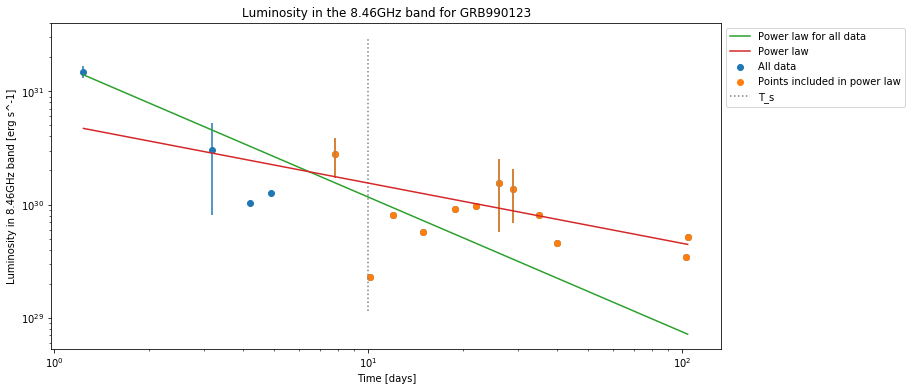

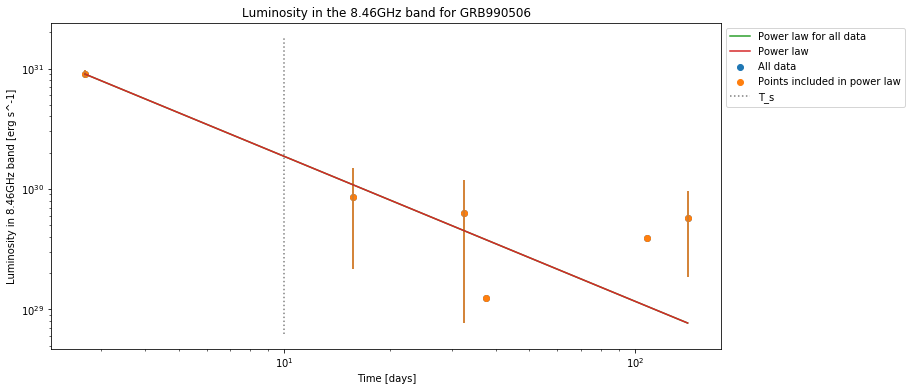

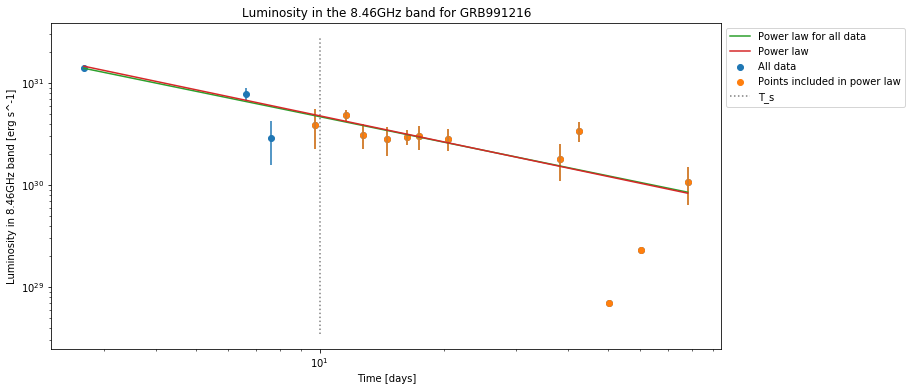

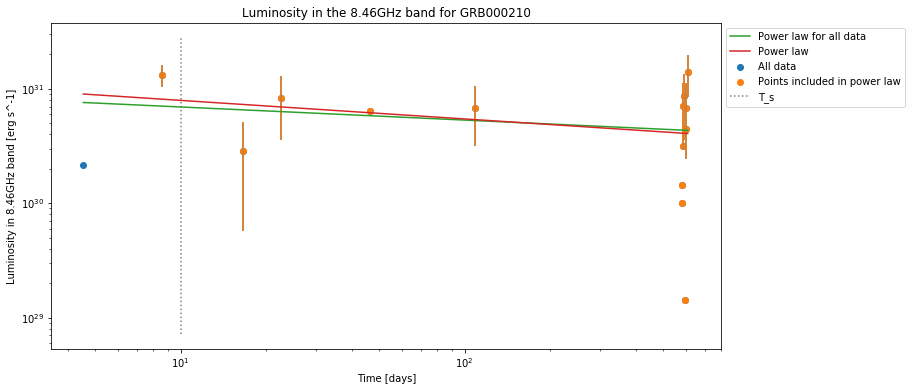

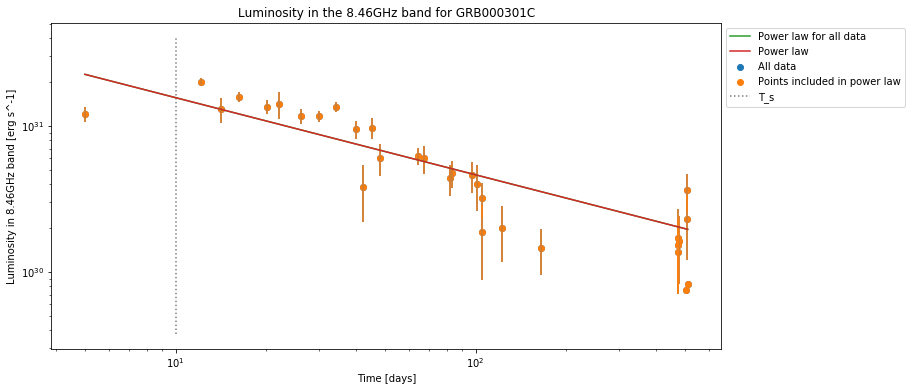

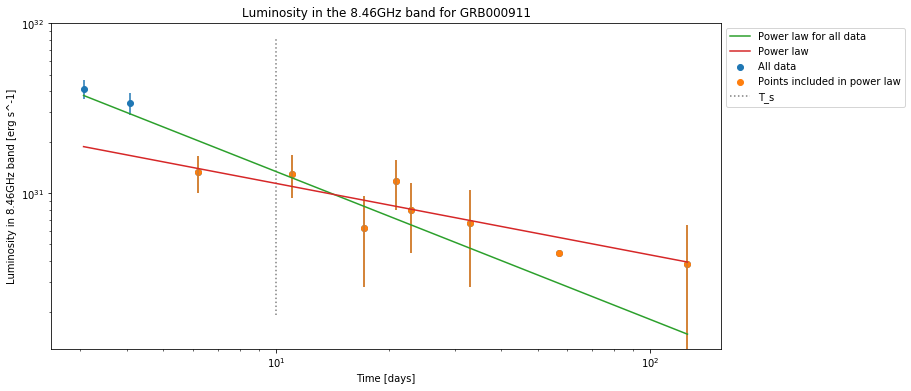

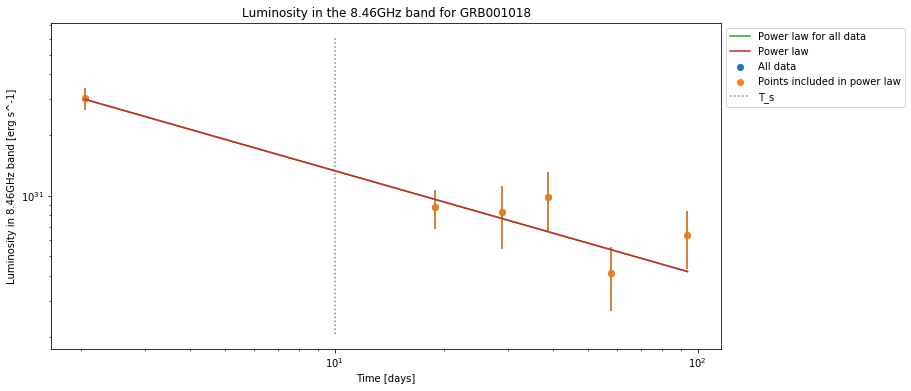

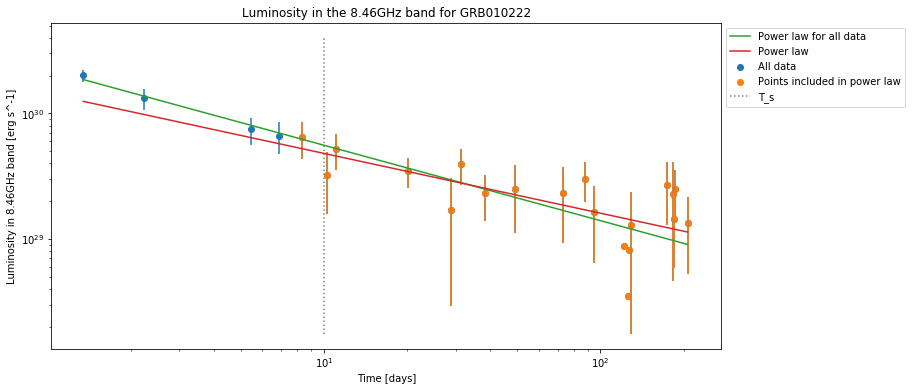

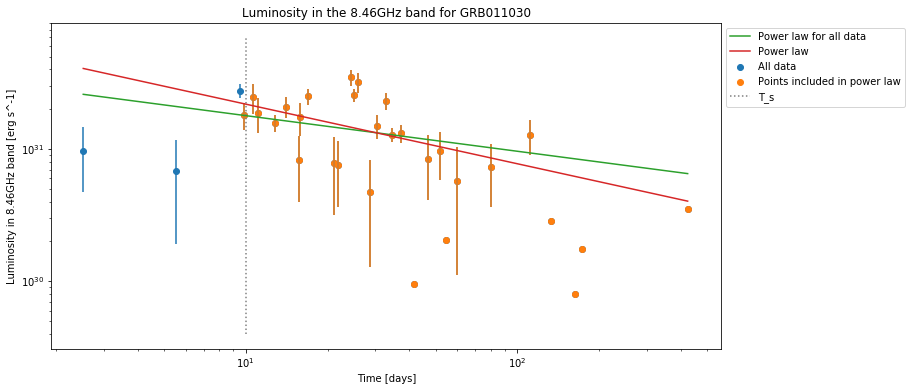

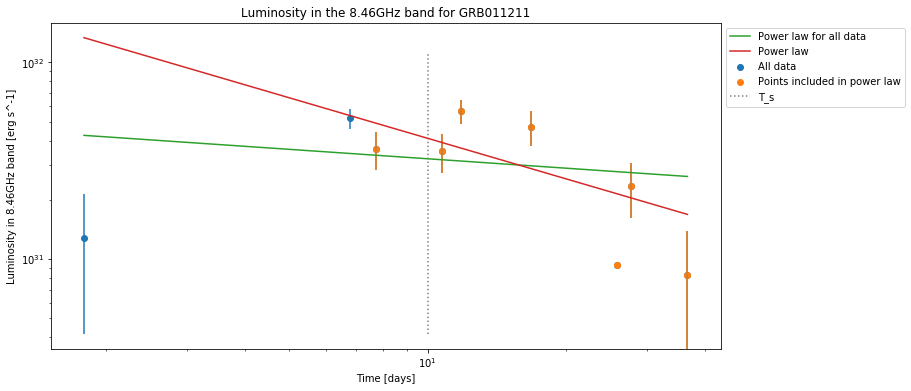

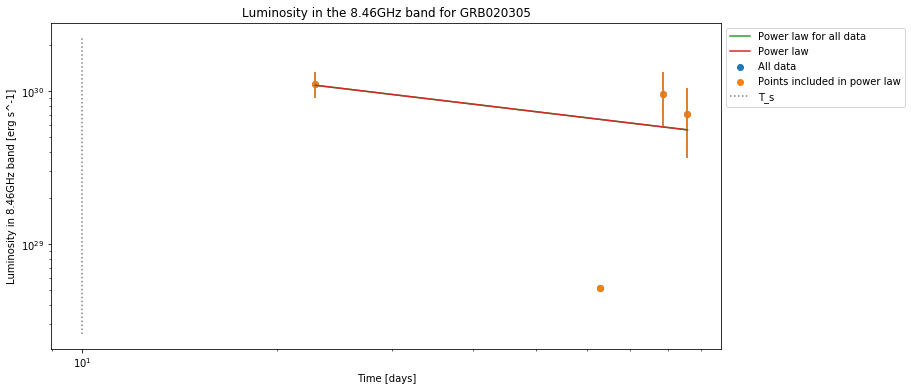

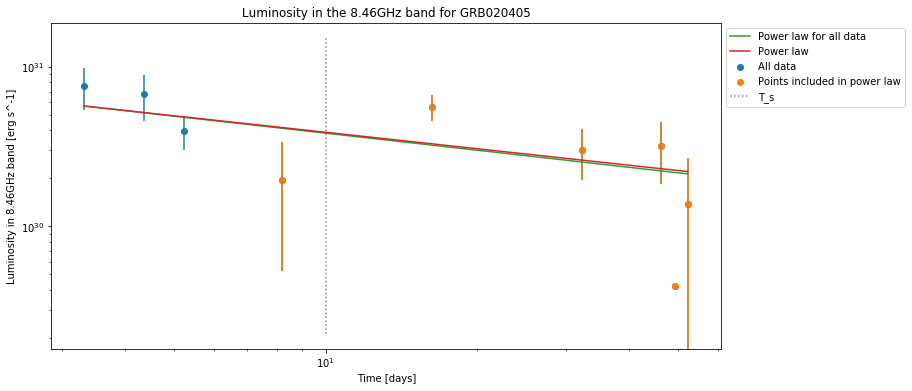

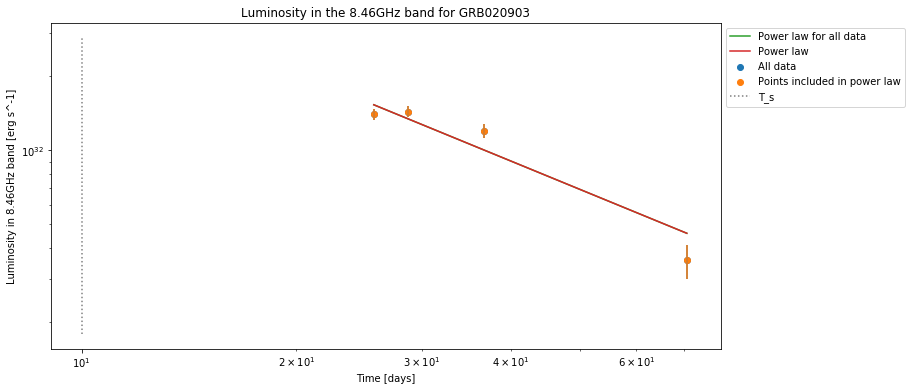

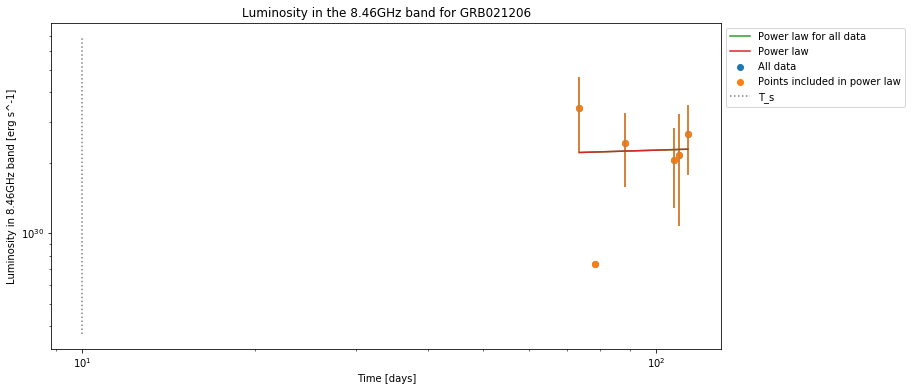

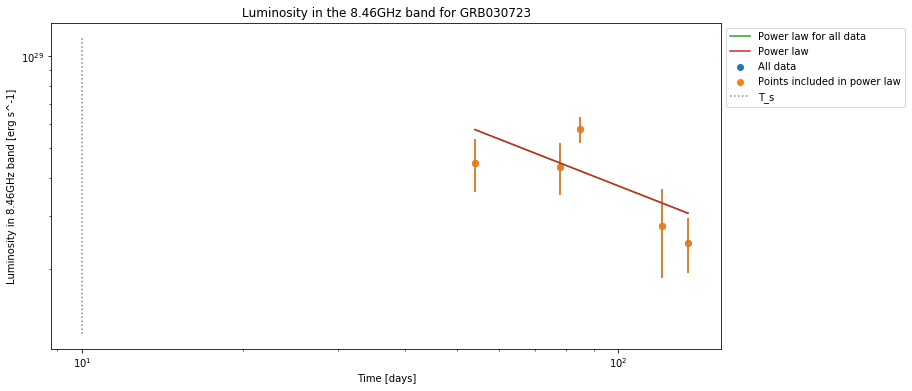

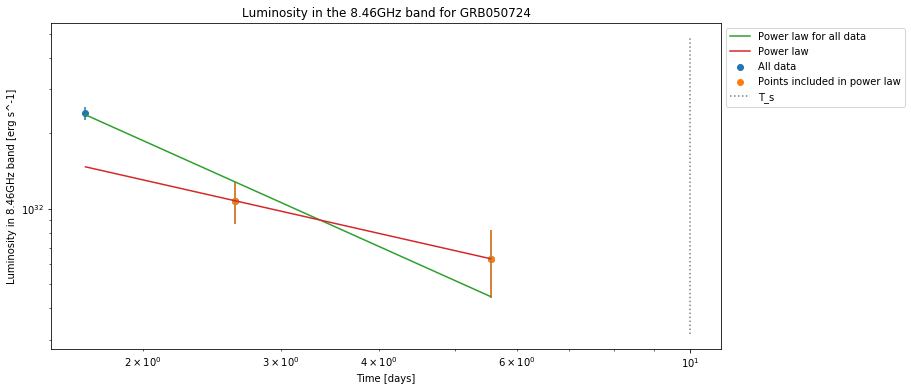

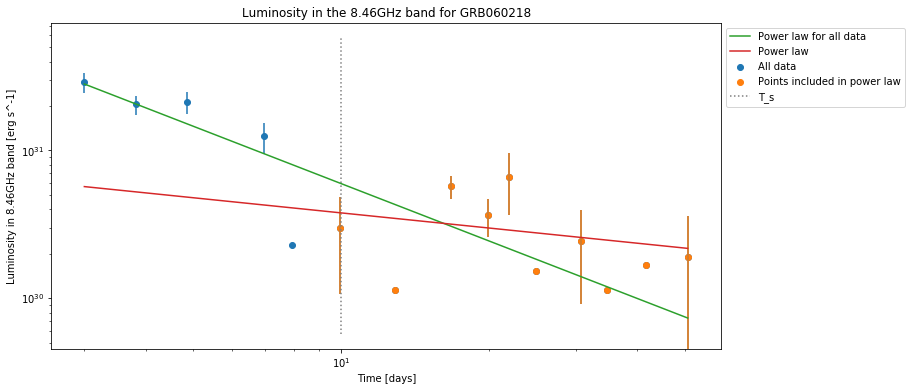

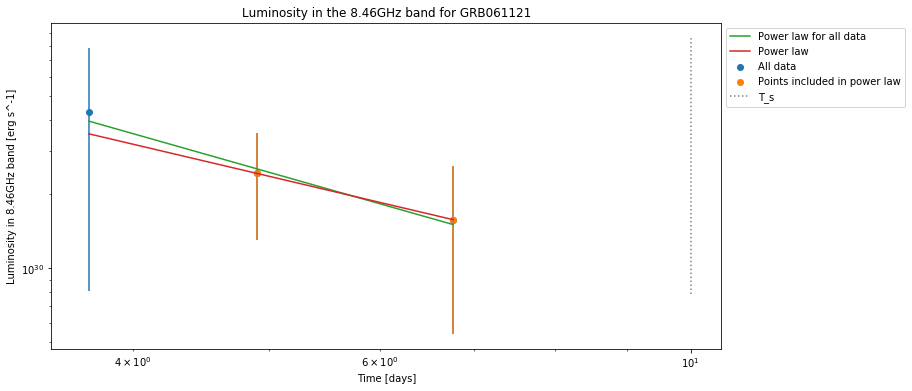

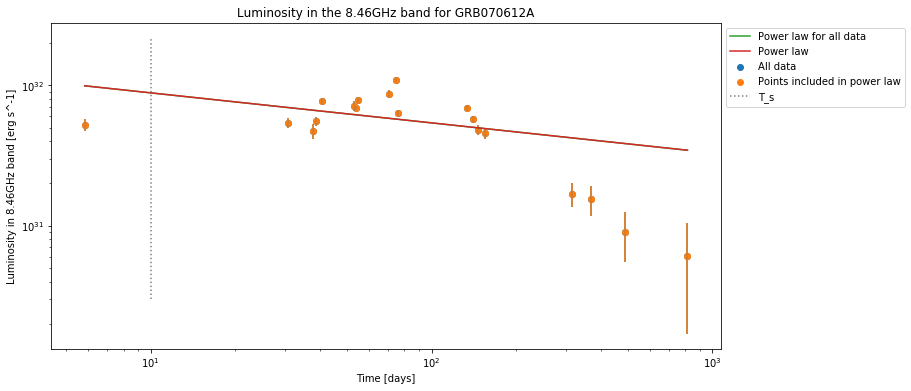

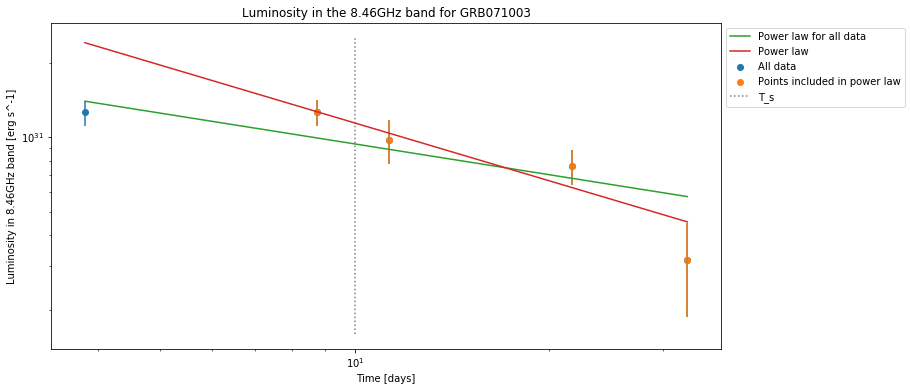

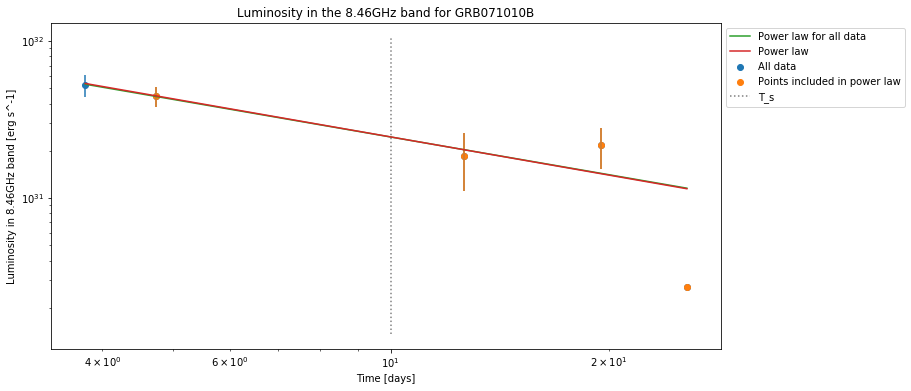

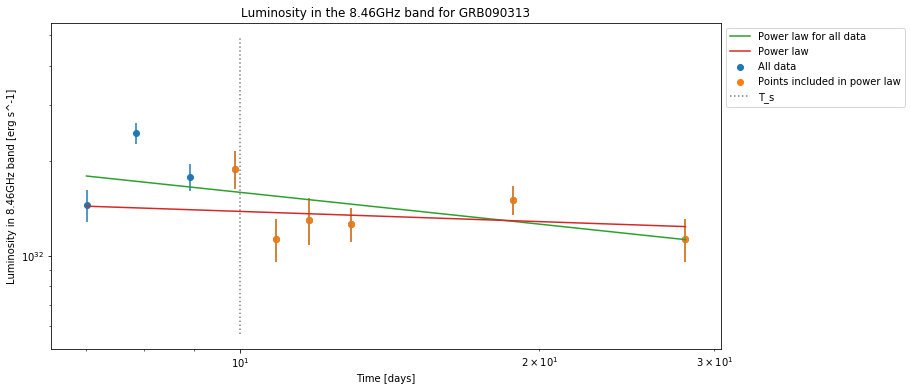

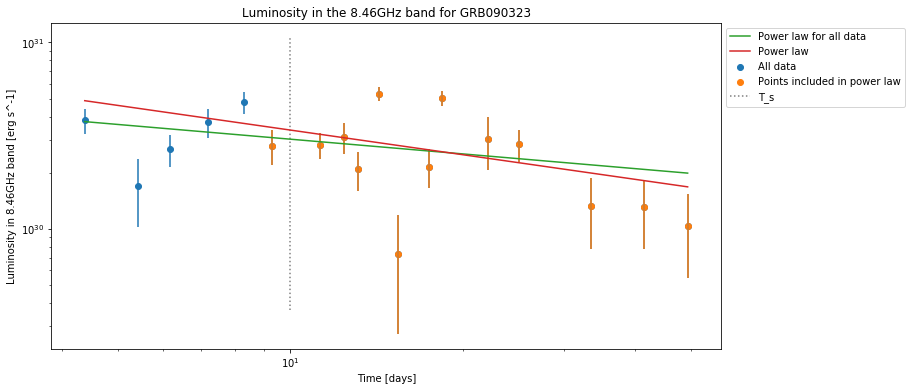

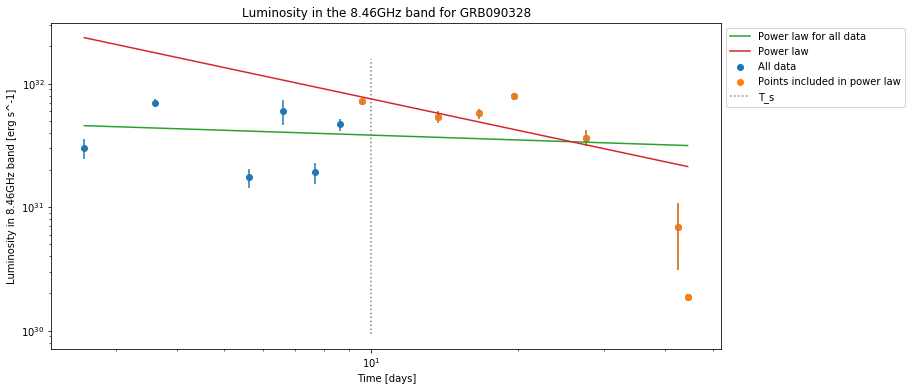

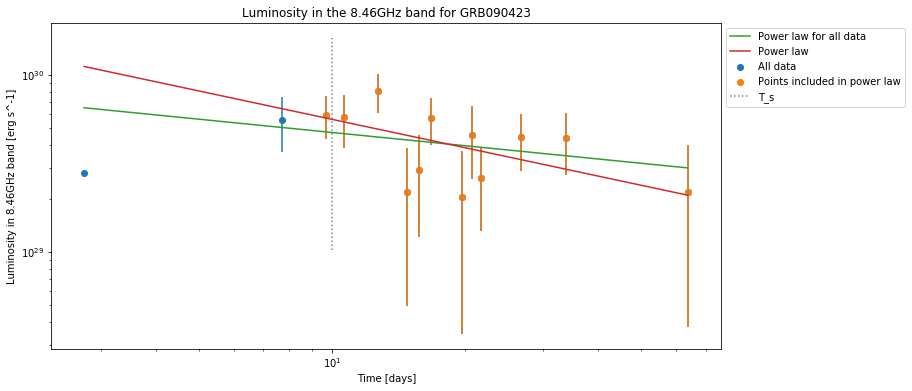

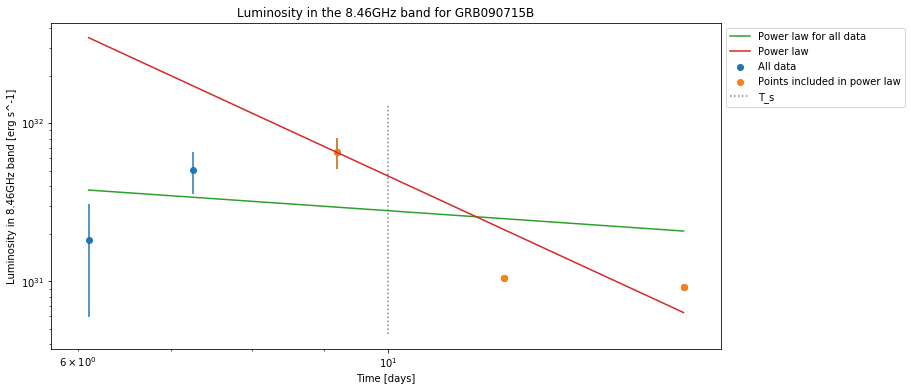

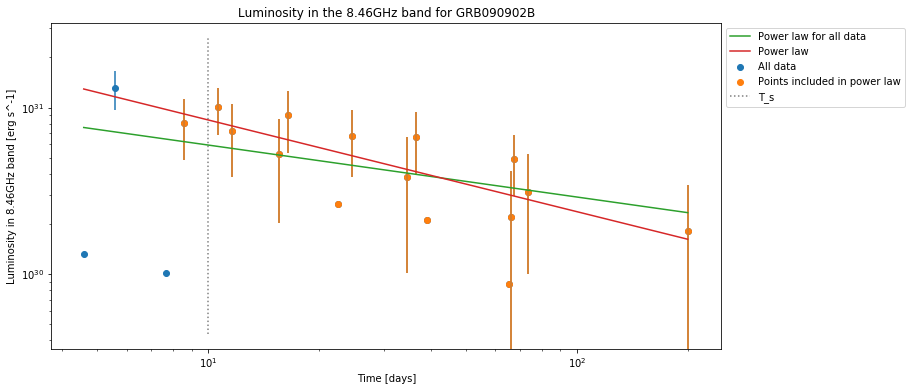

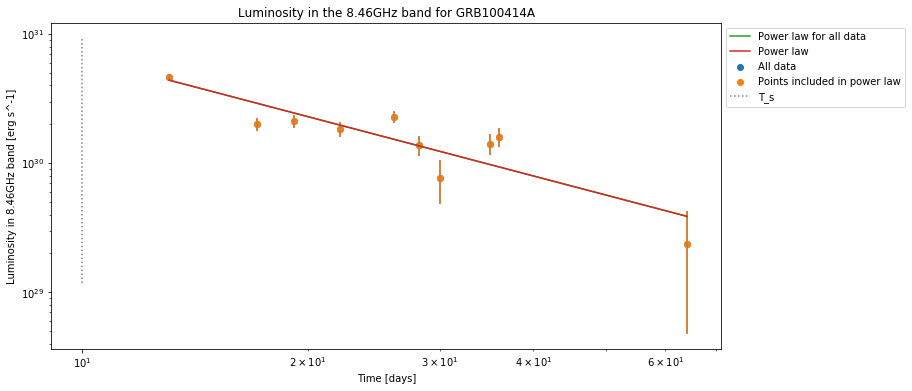

30


In [226]:
"""
PLOTTING A POWER LAW FOR ALL DATA
"""

# define the early time as 10 days
T_s = 10

# first GRB in the radio data with a redshift
first_GRB =  GRB_name[0]

# empty arrays to store data
time = []
flux = []
flux_err = []
GRB_plot = []
GRB_plot_f = []
decay_constant = []

# loop through rows in data for 8.46GHz
for row in data_freq:
    
    # get name of GRB for that row
    GRB = row[0]
    
    # if GRB matches previous, add it to the array
    if re.match(GRB, first_GRB):
        
        # Adds data to array for that GRB
        time.append(row[1])
        flux.append(row[2])
        flux_err.append(row[3])

    # when it stops matching, plot the data and reset the arrays  
    else:
        
        if len(flux) >= 3:
            
            """
            # plot scatter graph of the individual flux curves
            fig = plt.subplot()
            plt.title(f'Flux in the 8.56GHz band for GRB{first_GRB}')
            plt.scatter(time, flux)
            plt.errorbar(time, flux, yerr = flux_err, fmt = ' ')
            plt.xscale("log")
            plt.xlabel("Time [days]")
            plt.yscale("log")
            plt.ylabel(r'Flux in 8.5GHz band [$\mu$Jy]')
            plt.show()
            """
            
            # Adds GRB to list if flux curve is plot
            GRB_plot_f.append(GRB)
            
            # identify redshift and luminosity distance for that GRB
            for j in GRB_z_d_l:
                
                x = j[0]
                
                if re.match(GRB, x):
                    
                    z = j[1]
                    d_l = j[2]
                    
                    # call on luminosity function to plot lum curves
                    lum = L(flux, d_l, z, beta)
                    lum_err = L_err(flux_err, d_l, z, beta)
                    
                    
                    # removes lightcurves where less than three of the points have an error
                    test_list = list(zip(lum, lum_err))
                    x = 0
                    for y in test_list:
                        if y[0] > y[1]:
                            x+=1
                    
                    if x > 2:
                    
                    
                        # calculating best fit parameters and covariances for all the data

                        # call on weight function to get the weights of the luminosity errorss
                        weight_lum = weight(lum_err)

                        # making power law model for linear fits
                        model1 = PowerLawModel(prefix='pow_')

                        # make parameters with starting values
                        par1 = model1.make_params(pow_amplitude=1e31, pow_exponent=-0.5)

                        # create results for these parameters using the weights
                        result1 = model1.fit(lum, par1, x=time, weights=weight_lum)

                        # get a and N from the results
                        a1_all = result1.best_values['pow_exponent']
                        N1_all = result1.best_values['pow_amplitude']

                        # call on power law function to create line with these parameters
                        decay_line_all = power_law1(time, N1_all, a1_all)



                        # calculate best fit parameters for data beyond T_s

                        # empty array to store the differences between the time values and T_s
                        diff = []

                        # enables code to move past GRBs with data beyond T_s
                        if time[0]<T_s:

                            # get the magnitude of the difference between T and T_s for each point
                            for T in time:

                                diff.append(abs(T-T_s))

                            # get index of time with smallest difference
                            idx1 = np.argmin(diff)

                            if idx1+1 == len(time):

                                if time[idx1]<T_s:
                                    idx2 = idx1 
                                    idx1 = idx1 - 1

                                if time[idx1]>T_s:
                                    idx2 = idx1 - 1

                            else:

                                if time[idx1]<T_s:
                                    idx2 = idx1+1

                                if time[idx1]>T_s:
                                    idx2 = idx1 -1

                            if time[idx1]>T_s:

                                    time_new = time[idx2:]
                                    lum_new = lum[idx2:]
                                    lum_err_new = lum_err[idx2:]

                            else:

                                time_new = time[idx1:]
                                lum_new = lum[idx1:]
                                lum_err_new = lum_err[idx1:]



                        # if data doesn't extend beyond T_s
                        if time[0]>T_s:

                            time_new = time
                            lum_new = lum
                            lum_err_new = lum_err



                        # call on weight function to get the weights of the luminosity errorss
                        weight_lum_new = weight(lum_err_new)

                        # making power law model for linear fits
                        model1 = PowerLawModel(prefix='pow_')

                        # make parameters with starting values
                        par1 = model1.make_params(pow_amplitude=1e31, pow_exponent=-0.5)

                        # create results for these parameters using the weights
                        result1 = model1.fit(lum_new, par1, x=time_new, weights=weight_lum_new)

                        # get a and N from the results
                        a1 = result1.best_values['pow_exponent']
                        N1 = result1.best_values['pow_amplitude']

                        # call on power law function to create line with these parameters
                        decay_line = power_law1(time, N1, a1)



                        # defining min and max values for plotting of T_s line
                        ymin_T_s = 0.5*min(lum)
                        ymax_T_s = 2*max(lum)



                        # plot scatter graph of the individual luminosity curves
                        plt.figure(figsize = (12, 6))
                        plt.title(f'Luminosity in the 8.46GHz band for GRB{first_GRB}')
                        plt.xscale("log")
                        plt.xlabel("Time [days]")
                        plt.yscale("log")
                        plt.ylabel("Luminosity in 8.46GHz band [erg s^-1]")
                        plt.scatter(time, lum, label='All data')
                        plt.errorbar(time, lum, yerr = lum_err, fmt = ' ')
                        plt.scatter(time_new, lum_new, label = 'Points included in power law')
                        plt.errorbar(time_new, lum_new, yerr = lum_err_new, fmt = ' ')
                        # plot the decay line for all data
                        plt.plot(time, decay_line_all, label='Power law for all data')
                        # plot the decay line for data beyond T_s
                        plt.plot(time, decay_line, label='Power law')
                        # plot a line showing T
                        plt.vlines(x=10, ymin=ymin_T_s, ymax=ymax_T_s, colors='grey', linestyle=':', label='T_s')
                        plt.legend(bbox_to_anchor=(1,1), loc="upper left")
                        plt.show()

                        # only stores the decay constants if there are points beyond T_s
                        if time[-1]>T_s:
                            decay_constant.append(a1)
                        
        # reset the arrays
        time = []
        flux = []
        flux_err = []
        
        # move to next GRB
        first_GRB = GRB
        continue
        
print(len(decay_constant))

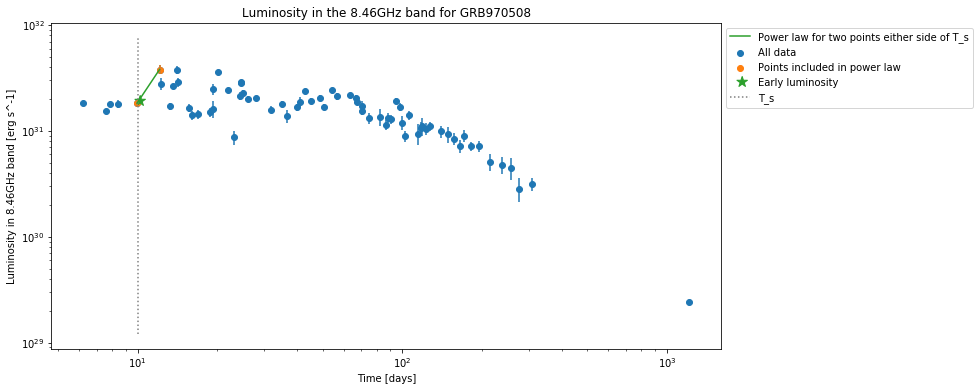

Early-time luminosity of GRB970508 is 1.8644827997063414e+31erg s^-1


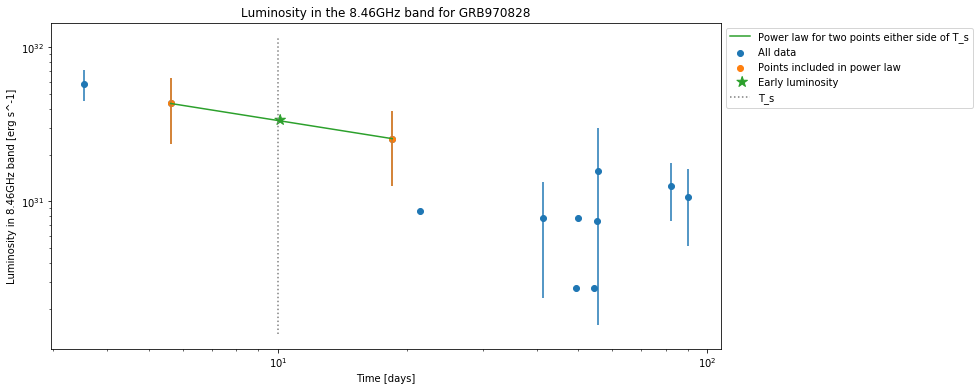

Early-time luminosity of GRB970828 is 3.3497845651103352e+31erg s^-1


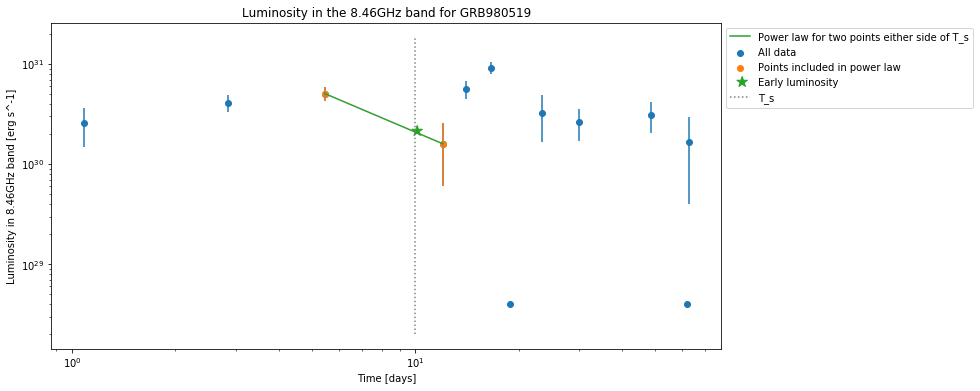

Early-time luminosity of GRB980519 is 2.0953007008249554e+30erg s^-1


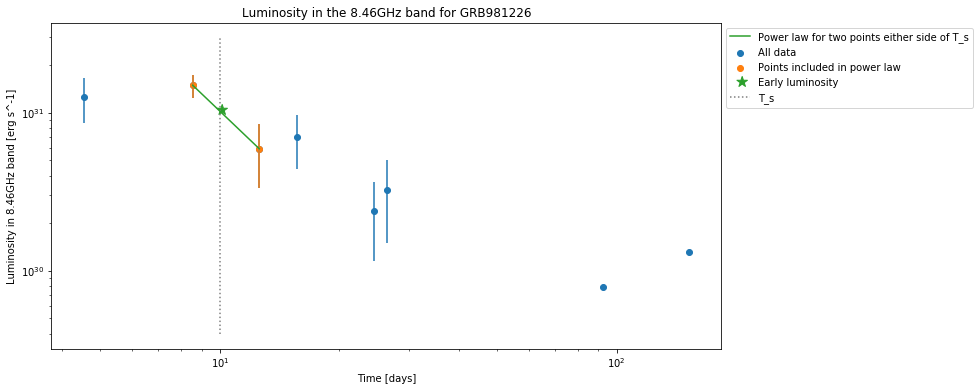

Early-time luminosity of GRB981226 is 1.0226228776946585e+31erg s^-1


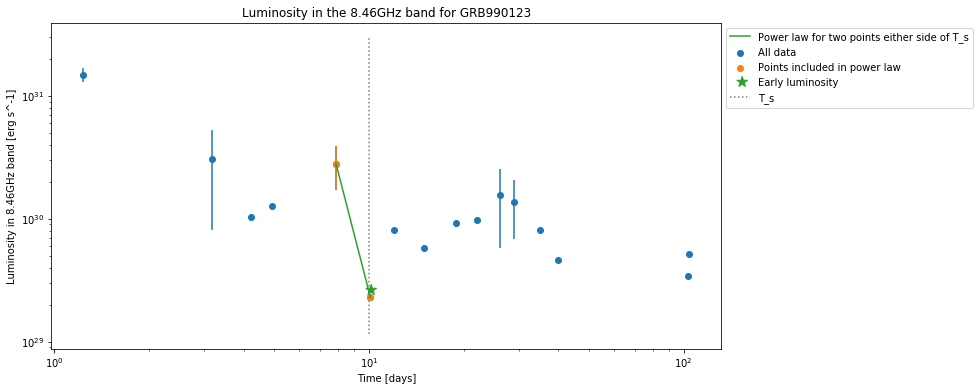

Early-time luminosity of GRB990123 is 2.5597979480774898e+29erg s^-1


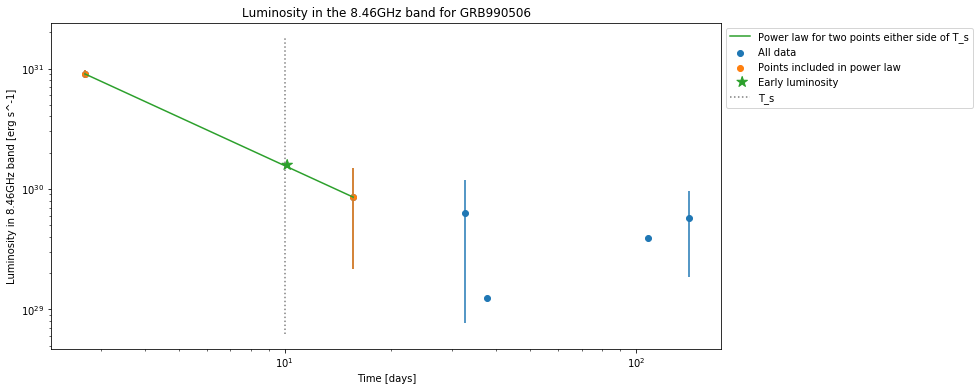

Early-time luminosity of GRB990506 is 1.5574605414387532e+30erg s^-1


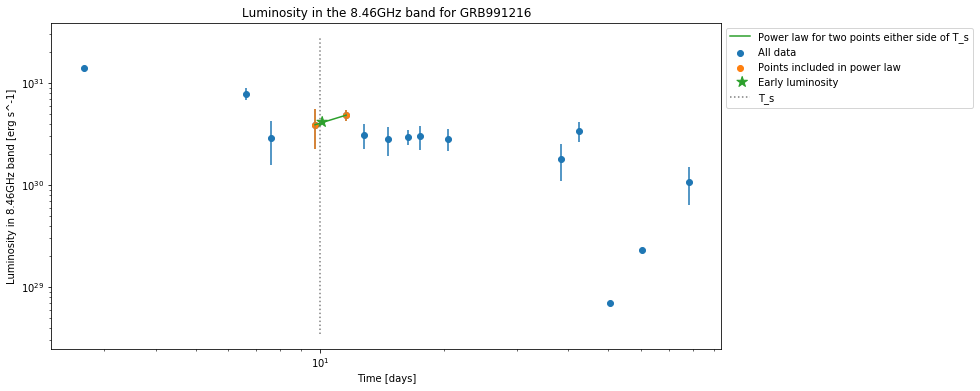

Early-time luminosity of GRB991216 is 4.0440732148628257e+30erg s^-1


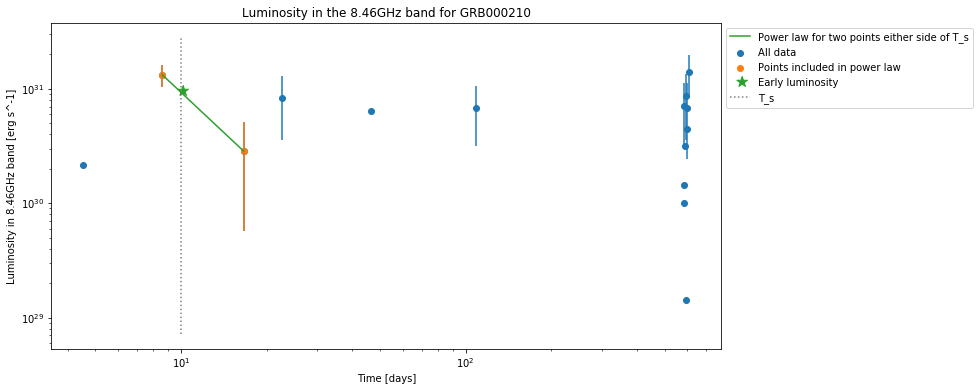

Early-time luminosity of GRB000210 is 9.331252260071064e+30erg s^-1


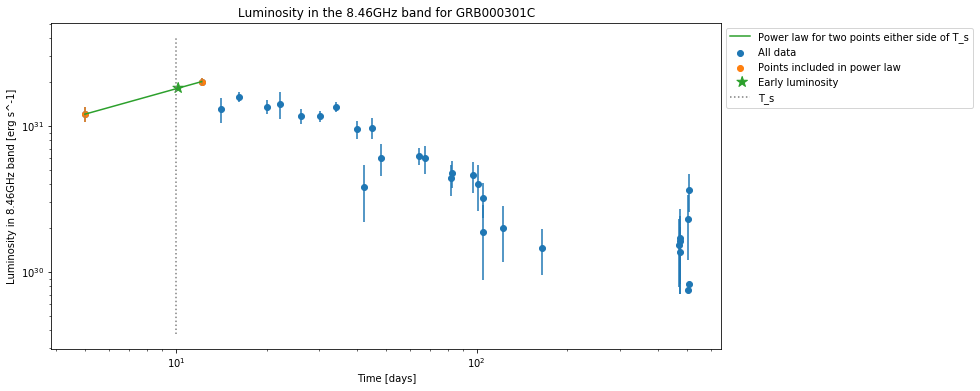

Early-time luminosity of GRB000301C is 1.800215990320307e+31erg s^-1


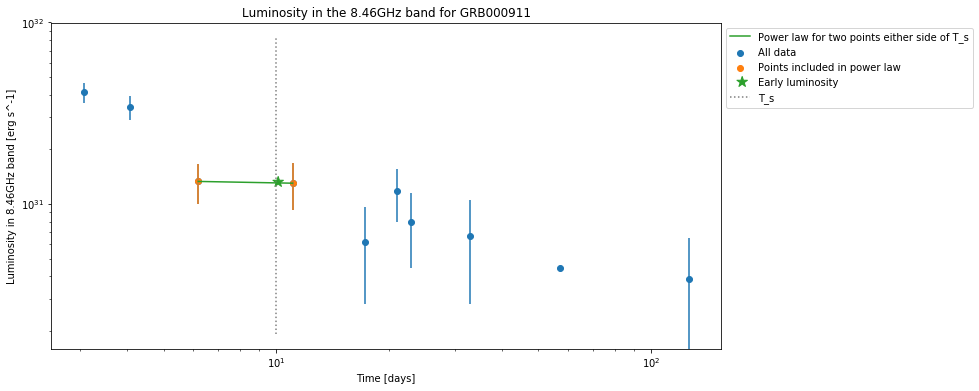

Early-time luminosity of GRB000911 is 1.308993631113942e+31erg s^-1


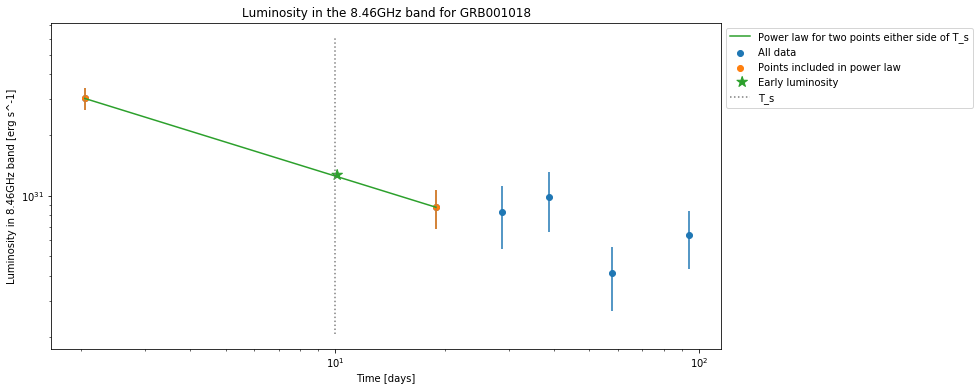

Early-time luminosity of GRB001018 is 1.2515052696722098e+31erg s^-1


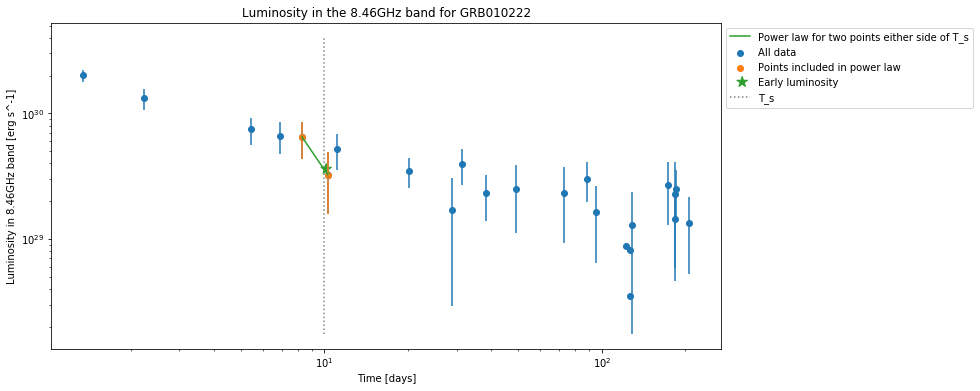

Early-time luminosity of GRB010222 is 3.545720359508505e+29erg s^-1


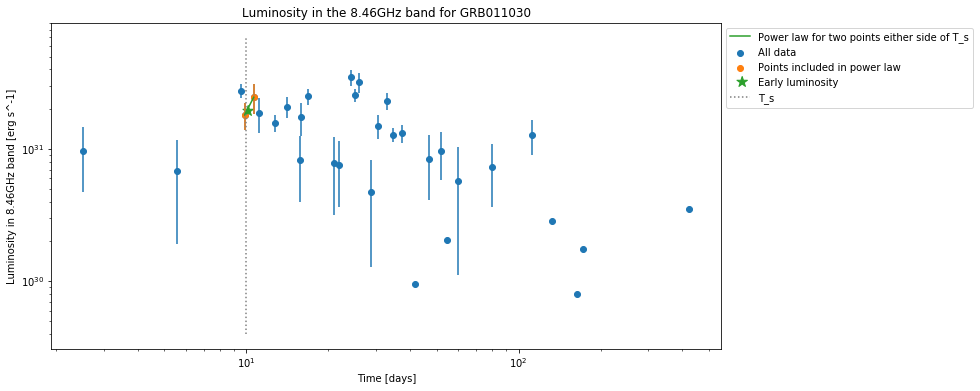

Early-time luminosity of GRB011030 is 1.9165359007718703e+31erg s^-1


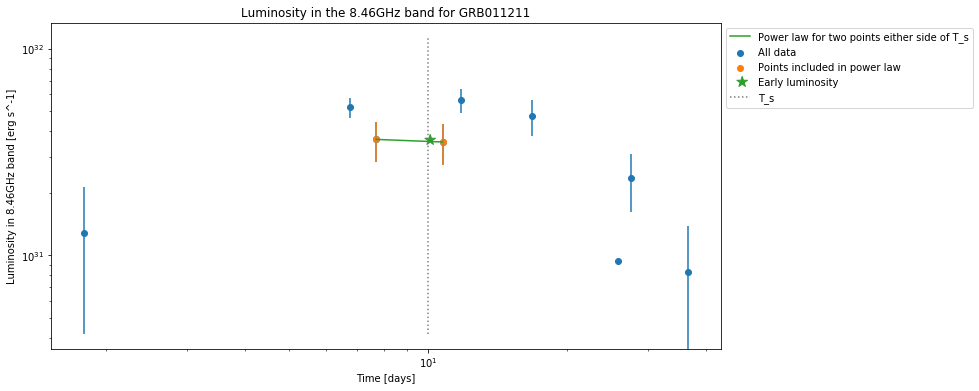

Early-time luminosity of GRB011211 is 3.554958222074667e+31erg s^-1


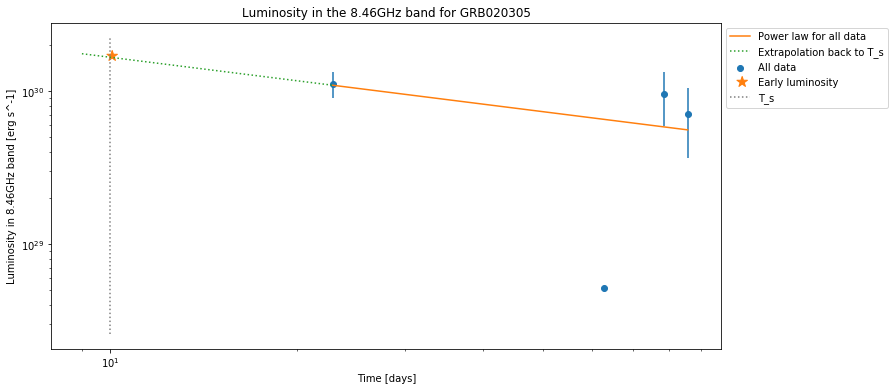

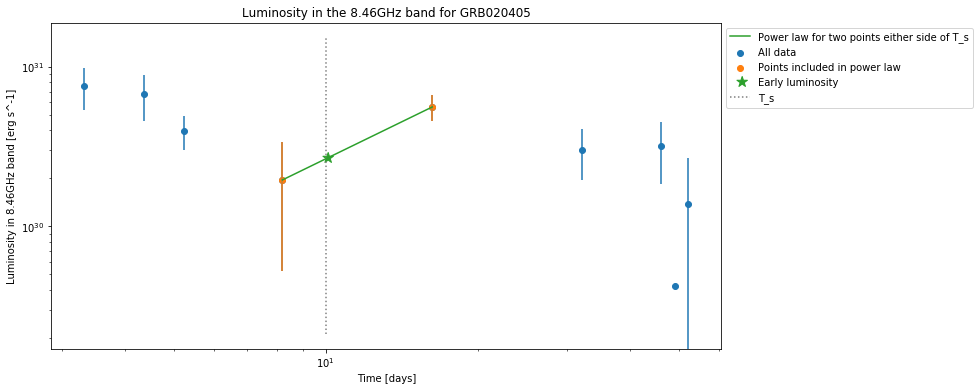

Early-time luminosity of GRB020405 is 2.6482286484606285e+30erg s^-1


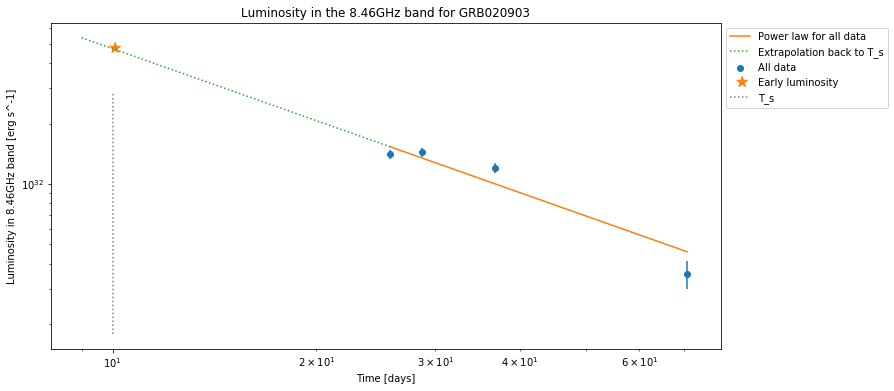

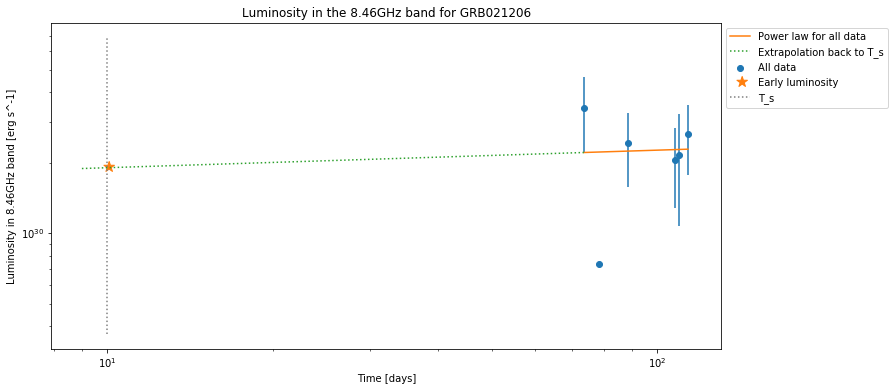

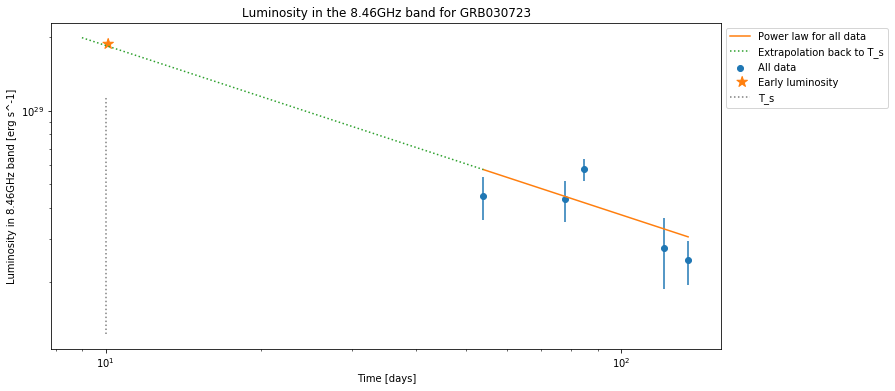

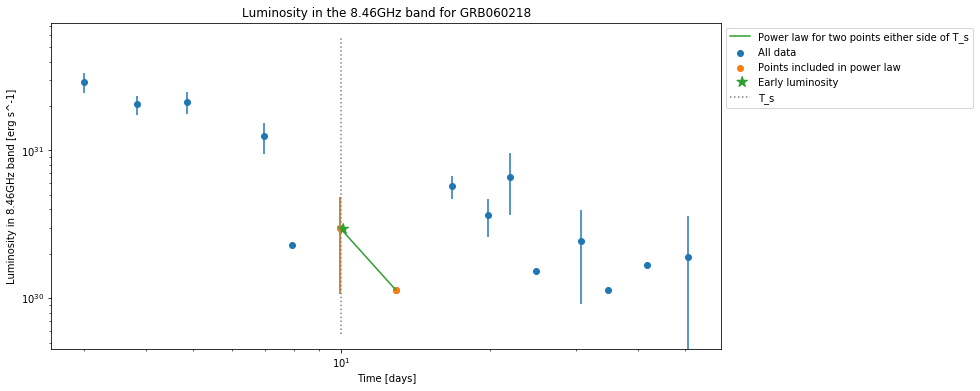

Early-time luminosity of GRB060218 is 2.914426776596448e+30erg s^-1


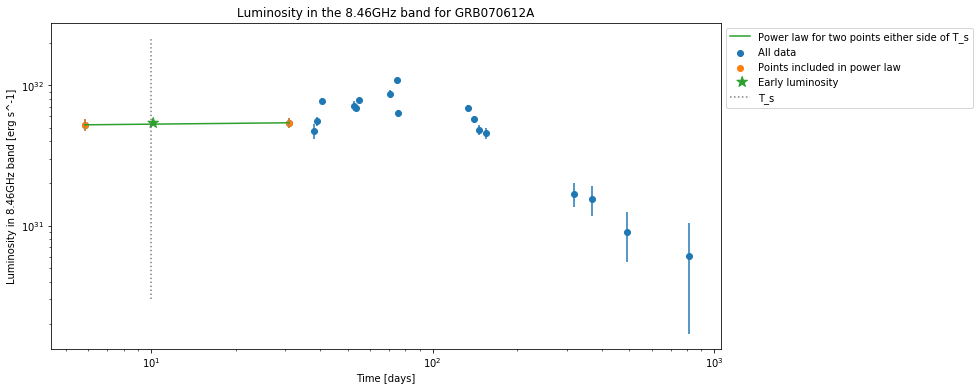

Early-time luminosity of GRB070612A is 5.286476645465814e+31erg s^-1


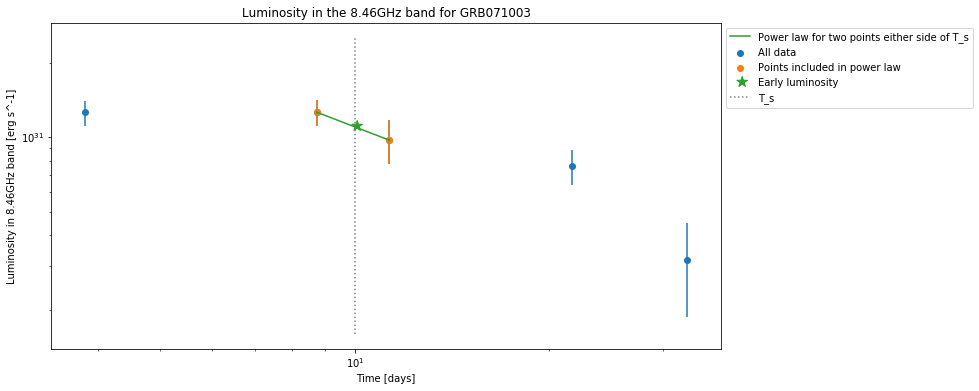

Early-time luminosity of GRB071003 is 1.0993249527319838e+31erg s^-1


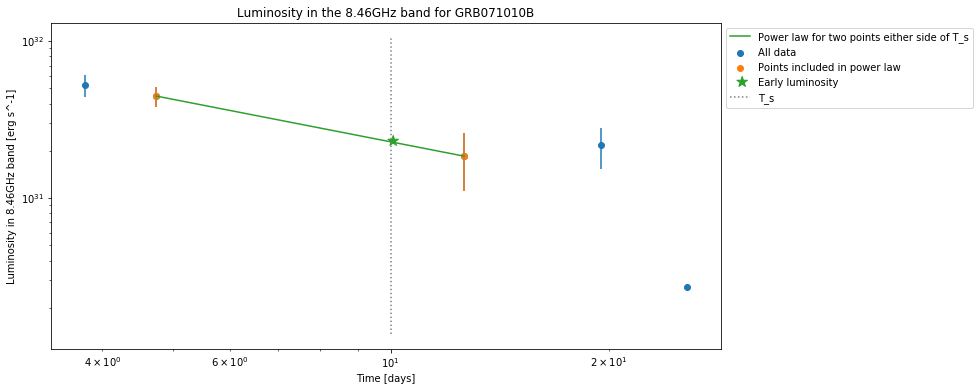

Early-time luminosity of GRB071010B is 2.285332173110256e+31erg s^-1


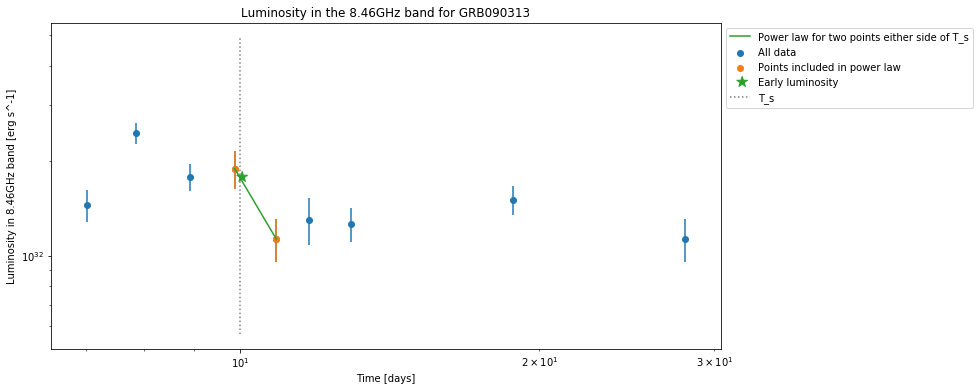

Early-time luminosity of GRB090313 is 1.768753122198634e+32erg s^-1


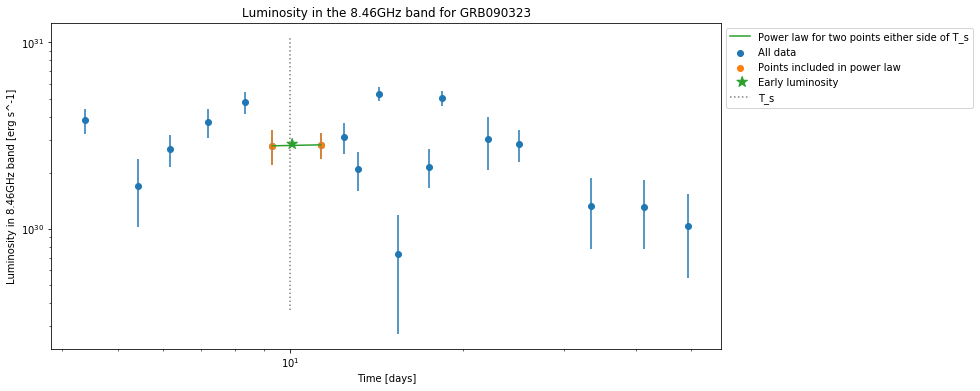

Early-time luminosity of GRB090323 is 2.799491843720781e+30erg s^-1


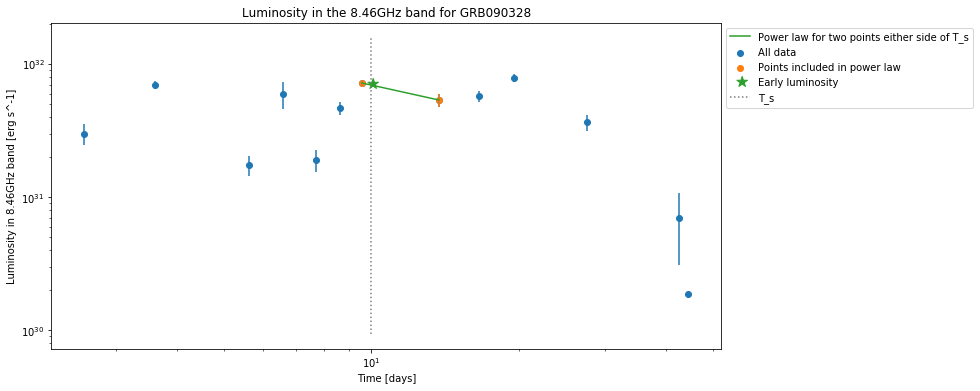

Early-time luminosity of GRB090328 is 6.963155284592439e+31erg s^-1


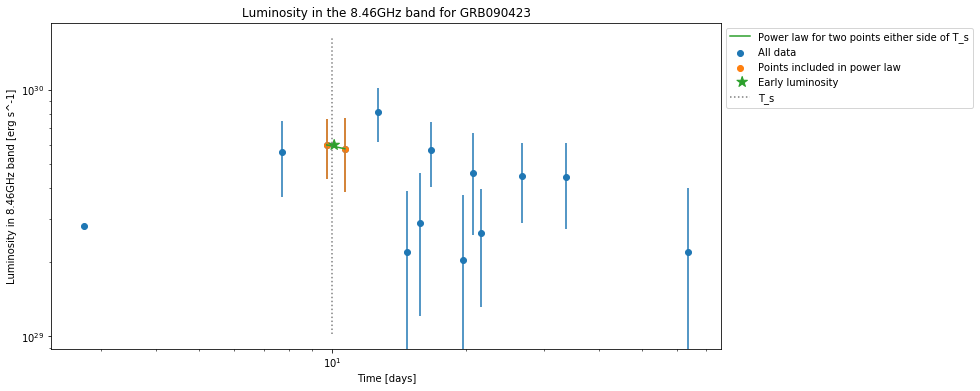

Early-time luminosity of GRB090423 is 5.9117653134081894e+29erg s^-1


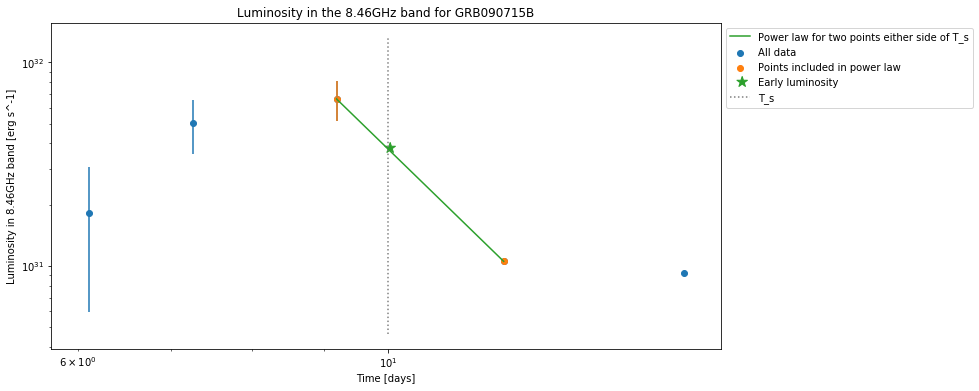

Early-time luminosity of GRB090715B is 3.7638381969245167e+31erg s^-1


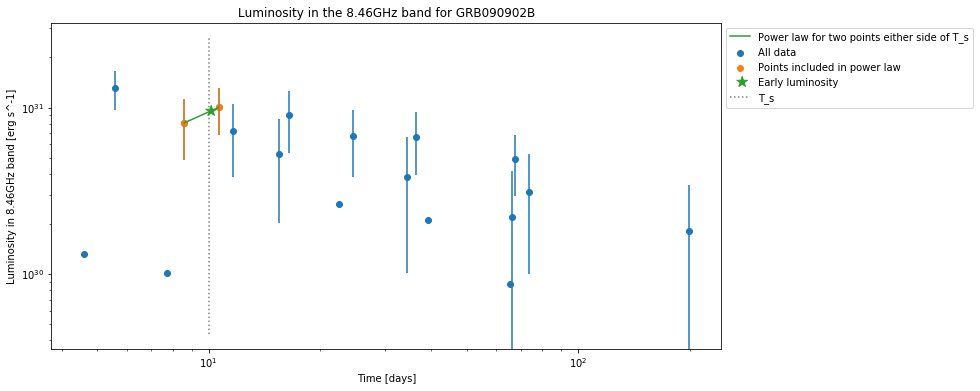

Early-time luminosity of GRB090902B is 9.415198094064584e+30erg s^-1


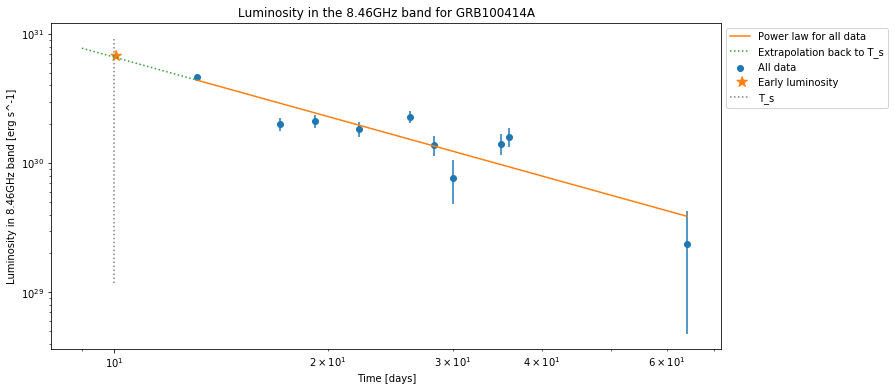

30


In [227]:
"""
FINDING THE EARLY LUMINOSITY
"""

# define the early time as 10 days
T_s = 10

# first GRB in the radio data with a redshift
first_GRB =  GRB_name[0]

# empty arrays to store data
time = []
flux = []
flux_err = []
GRB_plot = []
GRB_plot_f = []
early_lums = []

# loop through rows in data for 8.46GHz
for row in data_freq:
    
    # get name of GRB for that row
    GRB = row[0]
    
    # if GRB matches previous, add it to the array
    if re.match(GRB, first_GRB):
            
        # Adds data to array for that GRB
        time.append(row[1])
        flux.append(row[2])
        flux_err.append(row[3])

    # when it stops matching, plot the data and reset the arrays  
    else:
        
        if len(flux) >= 3:
            
            """
            # plot scatter graph of the individual flux curves
            fig = plt.subplot()
            plt.title(f'Flux in the 8.56GHz band for GRB{first_GRB}')
            plt.scatter(time, flux)
            plt.errorbar(time, flux, yerr = flux_err, fmt = ' ')
            plt.xscale("log")
            plt.xlabel("Time [days]")
            plt.yscale("log")
            plt.ylabel(r'Flux in 8.5GHz band [$\mu$Jy]')
            plt.show()
            """
            
            # Adds GRB to list if flux curve is plot
            GRB_plot_f.append(GRB)
            
            # identify redshift and luminosity distance for that GRB
            for j in GRB_z_d_l:
                
                x = j[0]
                
                if re.match(GRB, x):
                    
                    z = j[1]
                    d_l = j[2]
                    
                    # call on luminosity function to plot lum curves
                    lum = L(flux, d_l, z, beta)
                    lum_err = L_err(flux_err, d_l, z, beta)
                    
                    # removes lightcurves where less than three of the points have an error
                    test_list = list(zip(lum, lum_err))
                    x = 0
                    for y in test_list:
                        if y[0] > y[1]:
                            x+=1
                    
                    if x > 2:
                    
                        # defining min and max values for plotting of T_s line
                        ymin_T_s = 0.5*min(lum)
                        ymax_T_s = 2*max(lum)


                        # if there aren't points before T_s, extrapolate decay
                        if time[0]>T_s:

                            # call on weight function to get the weights of the luminosity errorss
                            weight_lum = weight(lum_err)

                            # making power law model for linear fits
                            model1 = PowerLawModel(prefix='pow_')

                            # make parameters with starting values
                            par1 = model1.make_params(pow_amplitude=1e31, pow_exponent=-0.5)

                            # create results for these parameters using the weights
                            result1 = model1.fit(lum, par1, x=time, weights=weight_lum)

                            # get a and N from the results
                            a1 = result1.best_values['pow_exponent']
                            N1 = result1.best_values['pow_amplitude']

                            # call on power law function to create line with these parameters
                            decay_line = power_law1(time, N1, a1)

                            # create power law that extrapolates back to T_s
                            time_extrap = np.linspace(T_s - 1, time[0], num = 1000)
                            decay_line_extrap = power_law1(time_extrap, N1, a1)

                            # Finding the luminosity at T_s
                            diff = []
                            for T in time_extrap:
                                diff.append(abs(T-T_s))

                            idx_T_s = np.argmin(diff)
                            early_lum = decay_line_extrap[idx_T_s]



                            # plot scatter graph of the individual luminosity curves
                            plt.figure(figsize = (12, 6))
                            plt.title(f'Luminosity in the 8.46GHz band for GRB{first_GRB}')
                            plt.xscale("log")
                            plt.xlabel("Time [days]")
                            plt.yscale("log")
                            plt.ylabel("Luminosity in 8.46GHz band [erg s^-1]")
                            plt.scatter(time, lum, label='All data')
                            plt.errorbar(time, lum, yerr = lum_err, fmt = ' ')
                            # plot the decay line for data beyond T_s
                            plt.plot(time, decay_line, label='Power law for all data')
                            # plot extrapolated line to get early luminosity from
                            plt.plot(time_extrap, decay_line_extrap, linestyle=':', label='Extrapolation back to T_s')
                            # plot the early luminosity point
                            plt.scatter(T_s, early_lum, marker=r'$\star$', s=200, label = 'Early luminosity')
                            # plot a line showing T
                            plt.vlines(x=10, ymin=ymin_T_s, ymax=ymax_T_s, colors='grey', linestyle=':', label='T_s')
                            plt.legend(bbox_to_anchor=(1,1), loc="upper left")
                            plt.show()

                        # if there are only points before T_s, then skip
                        if time[-1]<T_s:
                            continue

                        if time[0]<T_s:
                            # fitting power law to the two points arond T_s

                            for T in time:
                                if T<T_s:
                                    l_b_idx = time.index(T)

                            u_b_idx = l_b_idx + 2



                            time_2 = time[l_b_idx:u_b_idx]
                            lum_2 = lum[l_b_idx:u_b_idx]
                            lum_err_2 = lum_err[l_b_idx:u_b_idx]



                            # calculating best fit parameters and covariances for the data lmfit

                            # call on weight function to get the weights of the luminosity errorss
                            weight_lum = weight(lum_err_2)

                            # making power law model for linear fits
                            model1 = PowerLawModel(prefix='pow_')

                            # make parameters with starting values
                            par1 = model1.make_params(pow_amplitude=1e31, pow_exponent=-0.5)

                            # create results for these parameters using the weights
                            result1 = model1.fit(lum_2, par1, x=time_2, weights=weight_lum)

                            # get a and N from the results
                            a1 = result1.best_values['pow_exponent']
                            N1 = result1.best_values['pow_amplitude']


                            time_plot = np.linspace(time[l_b_idx], time[l_b_idx+1], num=1000)

                            # call on power law function to create line with these parameters
                            decay_line_2 = power_law1(time_plot, N1, a1)



                            # Finding the luminosity at T_s
                            diff = []
                            for T in time_plot:
                                diff.append(abs(T-T_s))

                            idx_T_s = np.argmin(diff)
                            early_lum = decay_line_2[idx_T_s]



                            # plot scatter graph of the individual luminosity curves
                            plt.figure(figsize = (12, 6))
                            plt.title(f'Luminosity in the 8.46GHz band for GRB{first_GRB}')
                            plt.xscale("log")
                            plt.xlabel("Time [days]")
                            plt.yscale("log")
                            plt.ylabel("Luminosity in 8.46GHz band [erg s^-1]")
                            plt.scatter(time, lum, label='All data')
                            plt.errorbar(time, lum, yerr = lum_err, fmt = ' ')
                            plt.scatter(time_2, lum_2, label = 'Points included in power law')
                            plt.errorbar(time_2, lum_2, yerr = lum_err_2, fmt = ' ')
                            # plot the early luminosity point
                            plt.scatter(T_s, early_lum, marker=r'$\star$', s=200, label = 'Early luminosity')
                            # plot the decay line between the two points around T_s
                            plt.plot(time_plot, decay_line_2, label='Power law for two points either side of T_s')
                            # plot a line showing T
                            plt.vlines(x=10, ymin=ymin_T_s, ymax=ymax_T_s, colors='grey', linestyle=':', label='T_s')
                            plt.legend(bbox_to_anchor=(1,1), loc="upper left")
                            plt.show()


                            print(f'Early-time luminosity of GRB{first_GRB} is {early_lum}erg s^-1')

                        # adds GRB to list if luminosity curve is plot
                        GRB_plot.append(GRB)

                        # add luminositites to an array
                        early_lums.append(early_lum)
                        
        # reset the arrays
        time = []
        flux = []
        flux_err = []
        
        # move to next GRB
        first_GRB = GRB
        continue

print(len(early_lums))

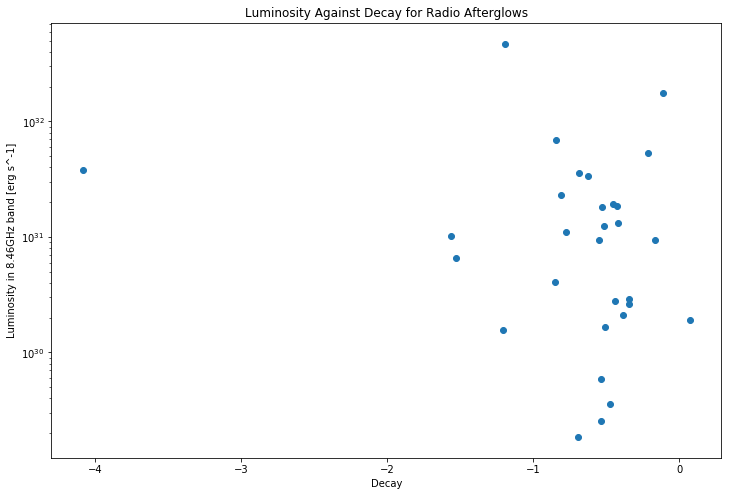

In [228]:
"""
PLOT OF LUMINOSITY AGAINST DECAY
"""

# plot scatter graph of early luminosity against decay 
plt.figure(figsize = (12, 8))
plt.title(f'Luminosity Against Decay for Radio Afterglows')
plt.xlabel("Decay")
plt.yscale("log")
plt.ylabel("Luminosity in 8.46GHz band [erg s^-1]")
plt.scatter(decay_constant, early_lums)
#plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()